# An Analysis of Climate Change: Examining the Consequences

This notebook covers an analysis in three parts, looking at a variety of data associated with the changing climate. It will first examine global temperatures, the rising sea levels and finally analyse the increasing occurence of extreme weather events, focusing on the United States. 




**Data sourced from:**

- **Climate Change: Earth Surface Temperature Data: ** [Berkeley Earth, Kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)
    - "We have repackaged the data from a newer compilation put together by the Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away."
    
- **Sea Level Change: ** [US Environment Protection Agency, Kaggle](https://www.kaggle.com/somesh24/sea-level-change)
    - "This data contains “cumulative changes in sea level for the world’s oceans since 1880, based on a combination of long-term tide gauge measurements and recent satellite measurements. It shows average absolute sea level change, which refers to the height of the ocean surface, regardless of whether nearby land is rising or falling. Satellite data are based solely on measured sea level, while the long-term tide gauge data include a small correction factor because the size and shape of the oceans are changing slowly over time. "
    
- **Storm Events Database: ** [National Oceanic and Atmospheric Administration, National Centers for Environmental Information](https://www.ncdc.noaa.gov/stormevents/)
    - "The Storm Events Database contains the records used to create the official NOAA Storm Data publication, documenting: (1) The occurrence of storms and other significant weather phenomena having sufficient intensity to cause loss of life, injuries, significant property damage, and/or disruption to commerce; (2)Rare, unusual, weather phenomena that generate media attention, such as snow flurries in South Florida or the San Diego coastal area; and (3) Other significant meteorological events, such as record maximum or minimum temperatures or precipitation that occur in connection with another event."    


### Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Set notebook style
plt.style.use("seaborn-whitegrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# I. Exploring Global Temperatures


### 1.1 Import Datasets

In [3]:
citytemp = pd.read_csv("Data/GlobalLandTemperaturesByCity.csv")
countrytemp = pd.read_csv("Data/GlobalLandTemperaturesByCountry.csv")
mcitytemp = pd.read_csv("Data/GlobalLandTemperaturesByMajorCity.csv")
statetemp = pd.read_csv("Data/GlobalLandTemperaturesByState.csv")
globaltemp = pd.read_csv("Data/GlobalTemperatures.csv")

In [4]:
#Display datasets and info
datasets = [citytemp, countrytemp, mcitytemp, statetemp, globaltemp]

for df in datasets: 
    display(df.head())
    display(df.info())
    print('\n', '_ ' * 50, '\n')

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


None


 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  



,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


None


 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


None


 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  



,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


None


 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  



,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


None


 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  



In [5]:
#Convert dt time columns to datetime objects
globaltemp.dt = pd.to_datetime(globaltemp.dt, yearfirst = True)
globaltemp.set_index('dt', inplace = True)

#### Looking at Global Temperatures Dataset

In [6]:
#Check for missing values
globaltemp.isna().sum()

LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [7]:
#Resample global temperatures to new frequency for EDA
gt_resampled = globaltemp.resample('Y').mean()

#Edit the index to YYYY format
gt_resampled.index = gt_resampled.index.year

#Preview new df
gt_resampled.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Exploratory Data Analysis and Visualizations

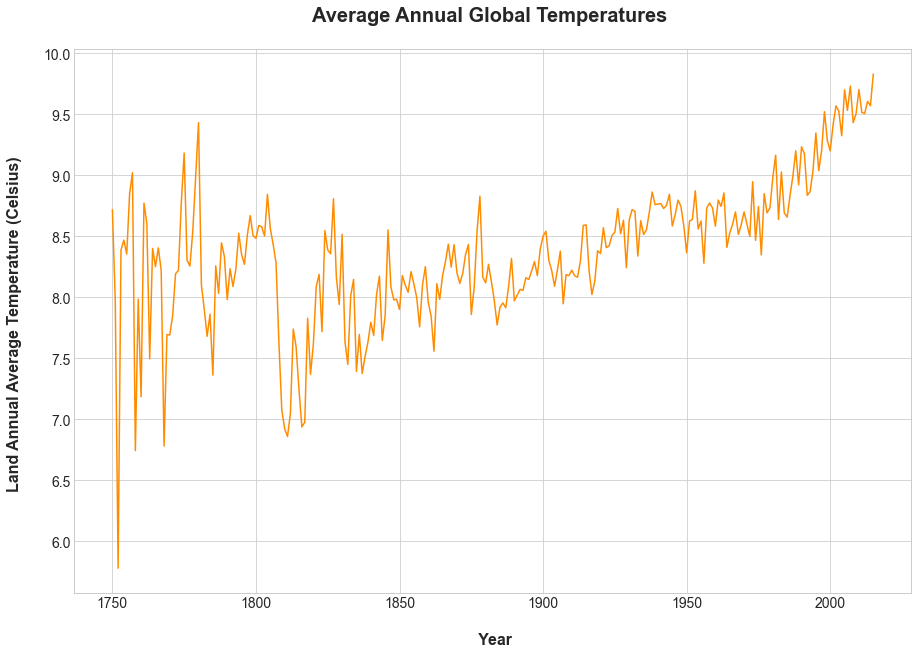

In [8]:
#Set size and plot
plt.figure(figsize=(15, 10))
plt.plot(gt_resampled.index, gt_resampled.LandAverageTemperature, color = "darkorange")

#Format Plot
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\n Year", fontsize = 16, fontweight = 'bold')
plt.ylabel("Land Annual Average Temperature (Celsius) \n", fontsize = 16, fontweight = 'bold')
plt.title("Average Annual Global Temperatures \n", fontsize = 20, fontweight = 'bold')

plt.show();

#### Zoom in on 1900 - present Data

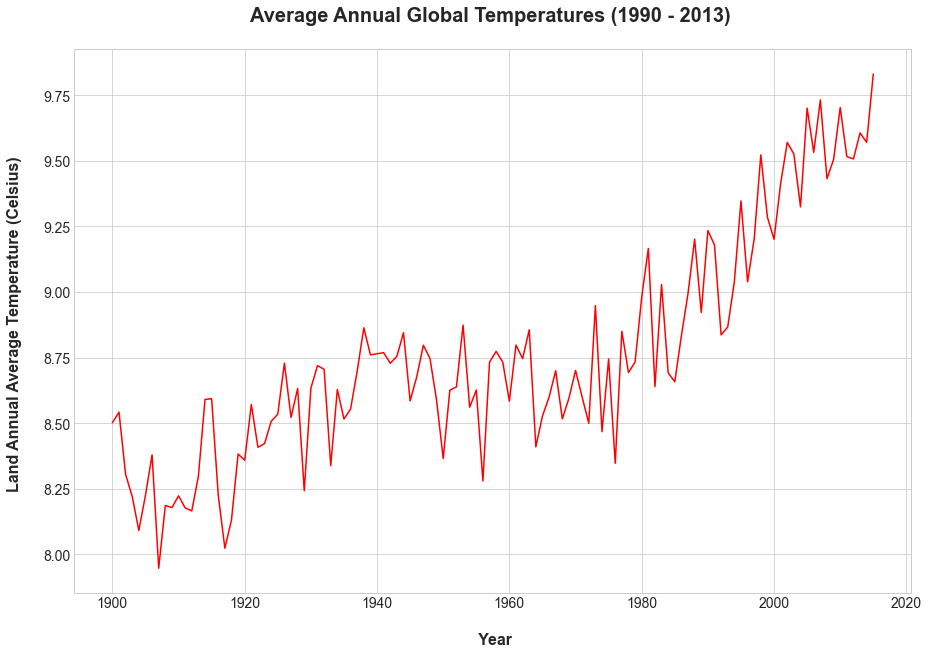

In [9]:
#Zoom in on data since 1900s
gt1900 = gt_resampled.loc[gt_resampled.index >= 1900]

#Set size and plot
plt.figure(figsize=(15, 10))
plt.plot(gt1900.index, gt1900.LandAverageTemperature, color = "red")

#Format Plot
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\n Year", fontsize = 16, fontweight = 'bold')
plt.ylabel("Land Annual Average Temperature (Celsius) \n", fontsize = 16, fontweight = 'bold')
plt.title("Average Annual Global Temperatures (1990 - 2013) \n", fontsize = 20, fontweight = 'bold')
plt.show();

In [10]:
#Explore seasonality variance
seasons = globaltemp.resample('6M').mean()
seasons.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-31,3.034000,3.574000,NaN,NaN,NaN,NaN,NaN,NaN
1750-07-31,9.596167,2.489333,NaN,NaN,NaN,NaN,NaN,NaN
1751-01-31,7.559400,2.795000,NaN,NaN,NaN,NaN,NaN,NaN
1751-07-31,7.065000,2.761750,NaN,NaN,NaN,NaN,NaN,NaN
1752-01-31,8.475333,2.913667,NaN,NaN,NaN,NaN,NaN,NaN


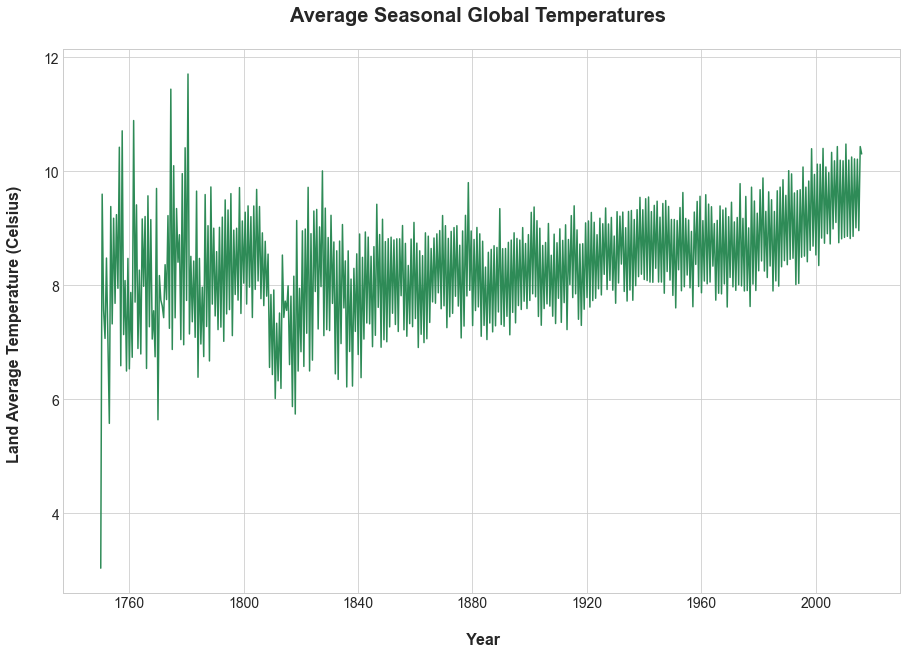

In [11]:
#Set size and plot
plt.figure(figsize = (15, 10))
plt.plot(seasons.index, seasons.LandAverageTemperature, color = "seagreen")

#Format Plot
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\n Year", fontsize = 16, fontweight = "bold")
plt.ylabel("Land Average Temperature (Celsius) \n", fontsize = 16, fontweight = "bold")
plt.title("Average Seasonal Global Temperatures \n", fontsize = 20, fontweight = "bold")

plt.show();

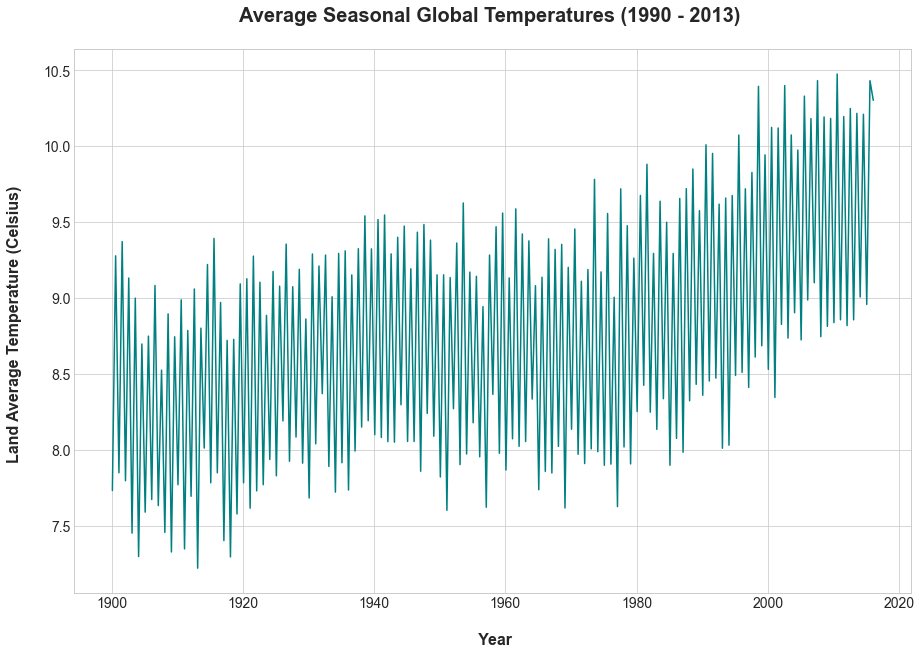

In [12]:
#Zoom in on 1900s to present
season1900 = seasons.loc[seasons.index.year >= 1900]

#Set size and plot
plt.figure(figsize = (15, 10))
plt.plot(season1900.index, season1900.LandAverageTemperature, color = "teal")

#Format Plot
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\n Year", fontsize = 16, fontweight = "bold")
plt.ylabel("Land Average Temperature (Celsius) \n", fontsize = 16, fontweight = "bold")
plt.title("Average Seasonal Global Temperatures (1990 - 2013) \n", fontsize = 20, fontweight = "bold")

plt.show();

### 1.3 Transforming and Testing for Stationarity

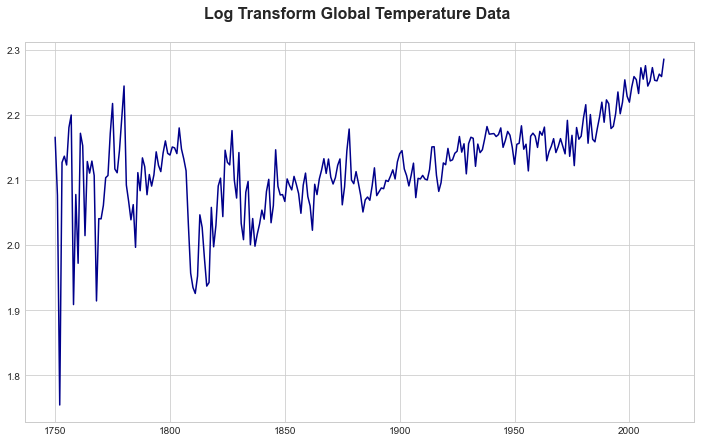

In [13]:
#Removing Trends 1: Log Transform -- dealing with changing variance
#Select the columns of interest in gt_resampled 
gtdata = gt_resampled.loc[:, ['LandAverageTemperature']]

#Log transform and preview
gtdata = np.log(gtdata)
plt.figure(figsize=(12, 7))
plt.plot(gtdata, color = 'darkblue')
plt.title("Log Transform Global Temperature Data \n", fontsize = 16, fontweight = "bold")
plt.show();

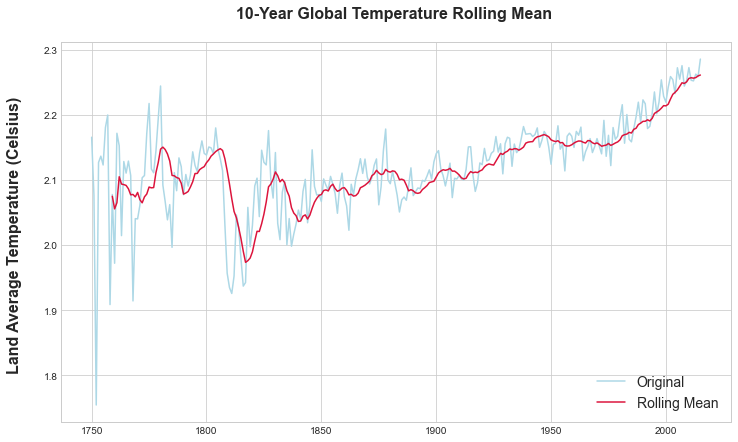

In [14]:
#Remove Trends 2: Rolling Mean
rolmean = gtdata.rolling(window = 10).mean()

plt.figure(figsize = (12, 7))
orig = plt.plot(gtdata, color = "lightblue", label = "Original")
mean = plt.plot(rolmean, color = "crimson", label = "Rolling Mean")
plt.legend(fontsize = 14)
plt.ylabel("Land Average Temperature (Celsius) \n", fontsize = 16, fontweight = "bold")
plt.title("10-Year Global Temperature Rolling Mean \n", fontsize = 16, fontweight = "bold")
plt.show();

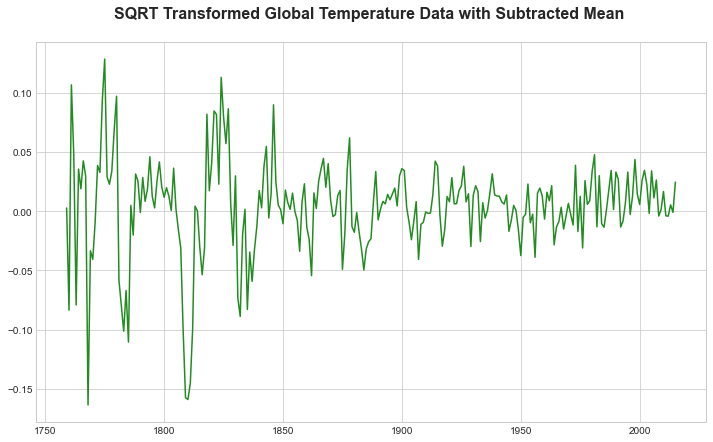

In [15]:
#Subtract Rolling Mean
gttrend = gtdata - rolmean

#Preview new data
plt.figure(figsize = (12, 7))
plt.plot(gttrend, color = 'forestgreen')
plt.title("SQRT Transformed Global Temperature Data with Subtracted Mean \n", fontsize = 16, fontweight = "bold")
plt.show();

#### Run Dickey-Fuller Test to verify data stationarity

In [16]:
#Remove null values for Dickey-Fuller test
gttrend.dropna(inplace = True)

In [17]:
#Instatiate test
gt_test = adfuller(gttrend)

#Display test results 
dfoutput = pd.Series(gt_test[0:4], index = ['Test-Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in gt_test[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Test-Statistic                -6.995246e+00
p-value                        7.563106e-10
#Lags Used                     1.000000e+01
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


The p-value of the test seems to suggest the data is stationary. 

### 1.4 Autocorrelation and Partial Autocorrelation Functions

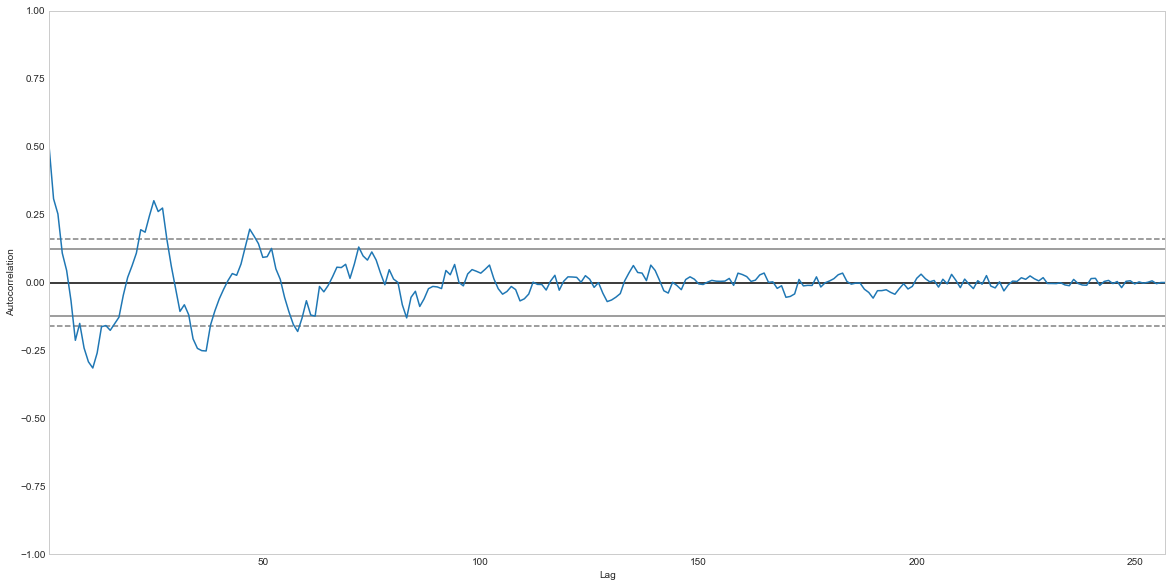

In [18]:
#Plot autocorrelation function
plt.figure(figsize = (20, 10))
pd.plotting.autocorrelation_plot(gttrend);

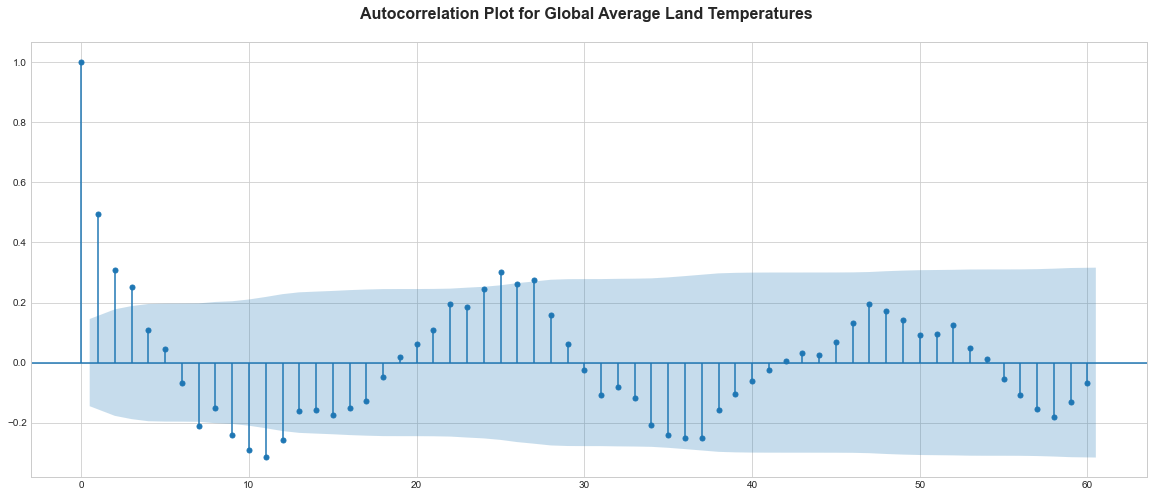

In [19]:
rcParams['figure.figsize'] = 20, 8
plot_acf(gttrend, lags = 60, alpha = .02)
plt.title("Autocorrelation Plot for Global Average Land Temperatures \n", 
         fontweight = "bold", fontsize = 16);

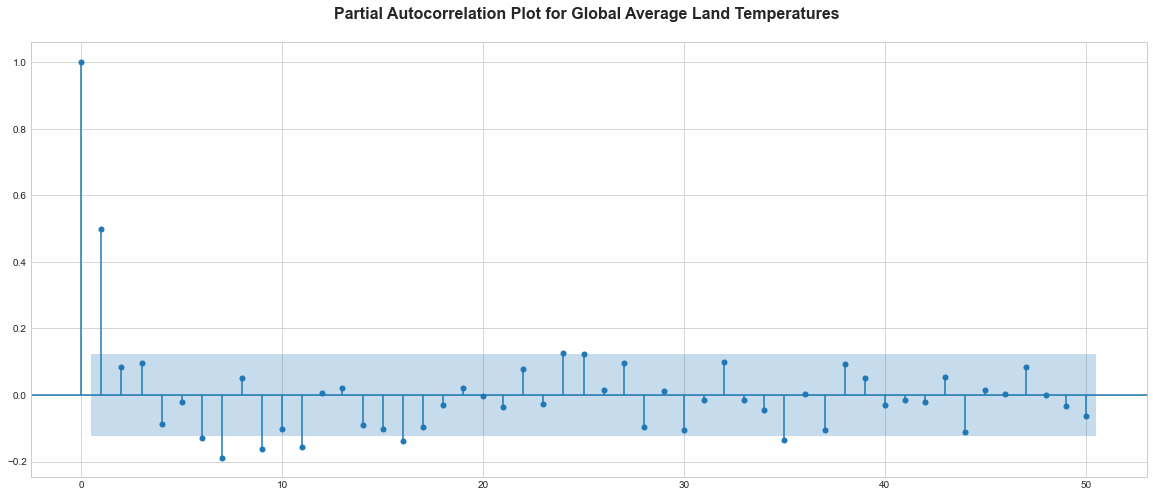

In [20]:
#Plot partial autocorrelation function
plot_pacf(gttrend, lags = 50)
plt.title("Partial Autocorrelation Plot for Global Average Land Temperatures \n", 
         fontweight = "bold", fontsize = 16);

### 1.5 ARIMA Modeling for Global Temperatures 1900 - 2013

In [21]:
#Generate different combinations for p, d and q parameters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

In [22]:
#Run a grid with the different parameters to calculate best AIC
res = []
for param in pdq:
    try:
        model = ARIMA(gttrend, order = param)
        output = model.fit()
        res.append([param, output.aic])
        print('ARIMA {} : AIC Calculated ={}'.format(param, output.aic))
    except:
        continue

ARIMA (0, 0, 0) : AIC Calculated =-917.2742571892622
ARIMA (0, 0, 1) : AIC Calculated =-972.392235261601
ARIMA (0, 1, 0) : AIC Calculated =-912.9137200832677
ARIMA (0, 1, 1) : AIC Calculated =-953.3727955298486
ARIMA (1, 0, 0) : AIC Calculated =-987.6475090134527
ARIMA (1, 0, 1) : AIC Calculated =-987.97789244216
ARIMA (1, 1, 0) : AIC Calculated =-937.681044014761
ARIMA (1, 1, 1) : AIC Calculated =-978.6012951425748


In [23]:
# Find the parameters with minimal AIC value
resdf = pd.DataFrame(res, columns=['pdq', 'aic'])
resdf.loc[resdf['aic'].idxmin()]

pdq    (1, 0, 1)
aic     -987.978
Name: 5, dtype: object

In [24]:
gt_model = ARIMA(gttrend, order = (1, 0, 0)).fit()
gt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     LandAverageTemperature   No. Observations:                  257
Model:                     ARIMA(1, 0, 0)   Log Likelihood                 496.824
Date:                    Thu, 29 Apr 2021   AIC                           -987.648
Time:                            15:53:39   BIC                           -977.000
Sample:                                 0   HQIC                          -983.366
                                    - 257                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.005      0.731      0.465      -0.006       0.012
ar.L1          0.4945      0.036     13.841      0.000       0.424       0.565
sigma2         0.0012   6.39e-05     19.159      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               205.38
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
mean_squared_error(gttrend, gt_model.predict())

0.0012244046554019305

### 1.6 Evaluate Model

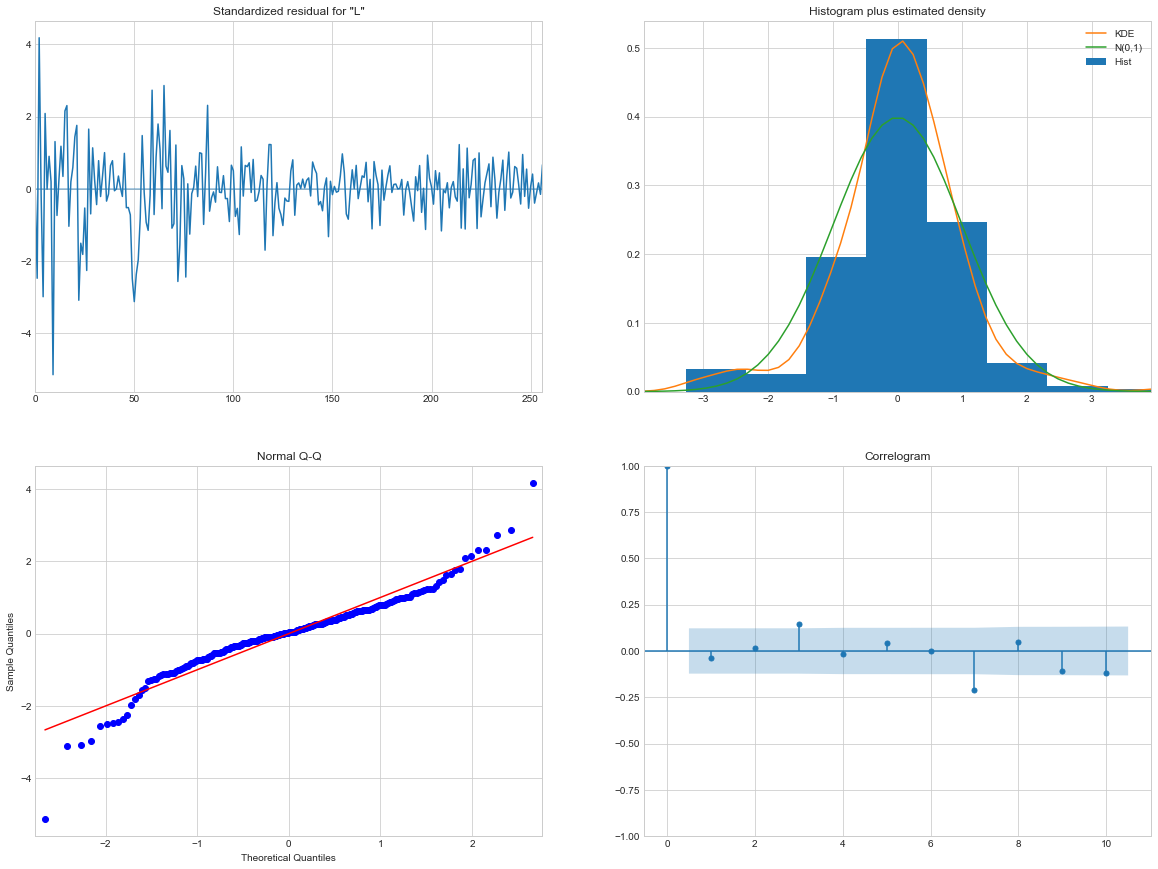

In [26]:
#Check diagnostics
gt_model.plot_diagnostics(figsize = (20, 15));

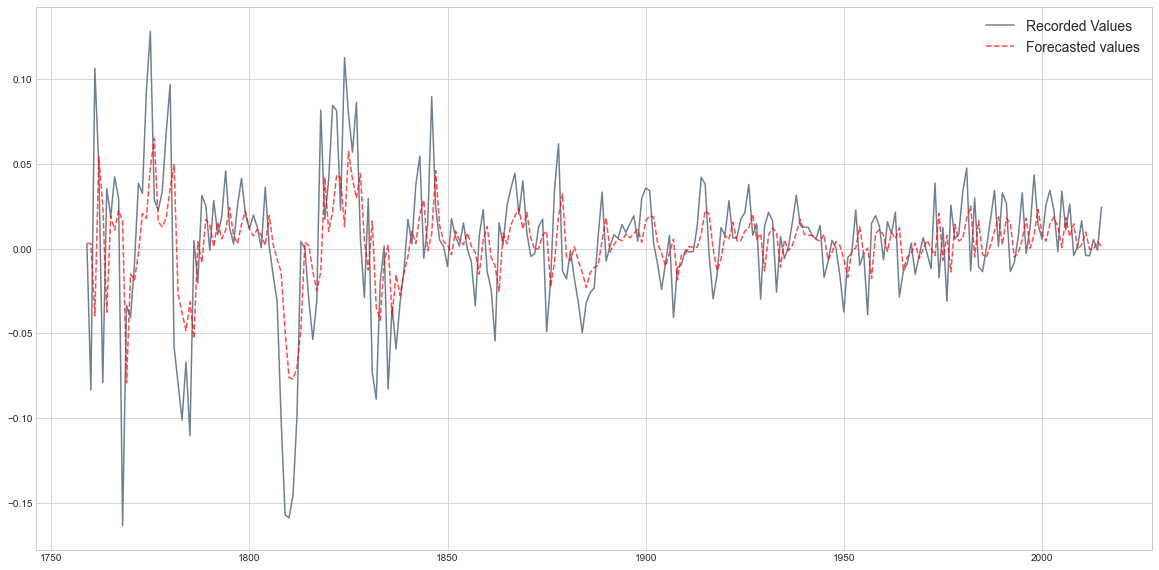

In [27]:
#Generate predictions for global temperatures
gt_pred = gt_model.predict()

#Plot real v. predicted values for model evaluation
fig = plt.figure(figsize = (20, 10))
real = plt.plot(gttrend, color = "slategrey", label = "Recorded Values")
predicted = plt.plot(gt_pred, label = "Forecasted values", color = "red", linestyle = 'dashed', alpha = .7)
plt.legend(fontsize = 14)

plt.show()

# II. Rising Sea Levels

### 2.1 Import Sea Level Dataset

In [28]:
#Load Dataset
seadf = pd.read_csv("Data/sea_levels_2015.csv")
seadf.head()

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2


In [29]:
seadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1608 non-null   object 
 1   GMSL              1608 non-null   float64
 2   GMSL uncertainty  1608 non-null   float64
dtypes: float64(2), object(1)
memory usage: 37.8+ KB


In [30]:
#Convert to datetime object
seadf.Time = pd.to_datetime(seadf.Time, yearfirst = True)

In [31]:
#Set datetime to index
seadf.set_index('Time', inplace = True)

In [32]:
display(seadf.head())
display(seadf.info())

,GMSL,GMSL uncertainty
Time,,
1880-01-15,-183.0,24.2
1880-02-15,-171.1,24.2
1880-03-15,-164.3,24.2
1880-04-15,-158.2,24.2
1880-05-15,-158.7,24.2


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1608 entries, 1880-01-15 to 2013-12-15
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GMSL              1608 non-null   float64
 1   GMSL uncertainty  1608 non-null   float64
dtypes: float64(2)
memory usage: 37.7 KB


None

### 2.2 Exploratory Data Analysis & Visualizing the Data

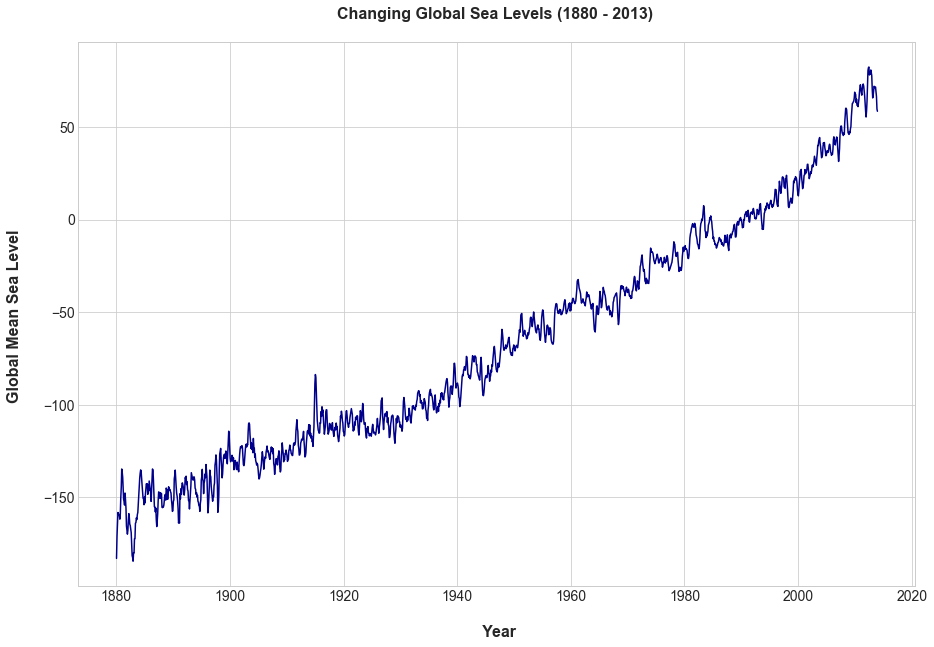

In [33]:
#Visualise sea level dataframe
#Set size and plot
plt.figure(figsize = (15, 10))
plt.plot(seadf.GMSL, color = "darkblue")

#Format plot
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\n Year", fontsize = 16, fontweight = "bold")
plt.ylabel("Global Mean Sea Level \n", fontsize = 16, fontweight = "bold")
plt.title("Changing Global Sea Levels (1880 - 2013) \n", fontsize = 16, fontweight = "bold")

plt.show();

In [34]:
#Zoom in on the data since 1980
sea1980 = seadf.loc[seadf.index.year >= 1980]
display(sea1980.head())
display(sea1980.info())

,GMSL,GMSL uncertainty
Time,,
1980-01-15,-15.2,6.5
1980-02-15,-14.1,6.5
1980-03-15,-16.1,6.4
1980-04-15,-15.8,6.5
1980-05-15,-16.1,6.5


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 1980-01-15 to 2013-12-15
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GMSL              408 non-null    float64
 1   GMSL uncertainty  408 non-null    float64
dtypes: float64(2)
memory usage: 9.6 KB


None

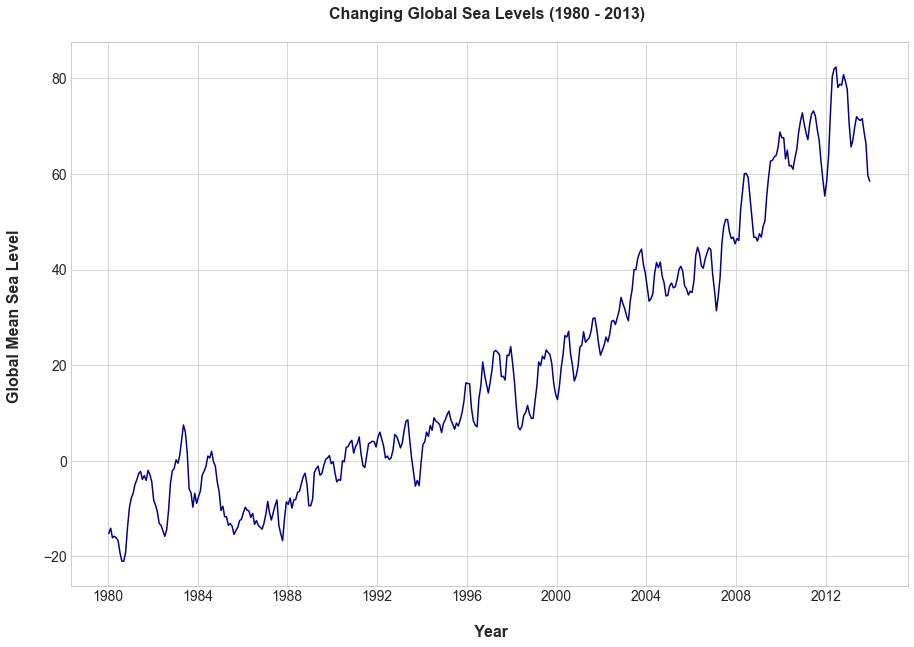

In [35]:
#Set size and plot
plt.figure(figsize = (15, 10))
plt.plot(sea1980.GMSL, color = "darkblue")

#Format plot
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\n Year", fontsize = 16, fontweight = "bold")
plt.ylabel("Global Mean Sea Level \n", fontsize = 16, fontweight = "bold")
plt.title("Changing Global Sea Levels (1980 - 2013) \n", fontsize = 16, fontweight = "bold")

plt.show();

In [36]:
#Zoom in on 2000+ data
sea2000 = seadf.loc[seadf.index.year >= 2000]
display(sea2000.head())
display(sea2000.info())

,GMSL,GMSL uncertainty
Time,,
2000-01-15,12.8,6.8
2000-02-15,15.5,6.8
2000-03-15,19.4,6.8
2000-04-15,22.2,6.8
2000-05-15,26.2,6.8


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2000-01-15 to 2013-12-15
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GMSL              168 non-null    float64
 1   GMSL uncertainty  168 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


None

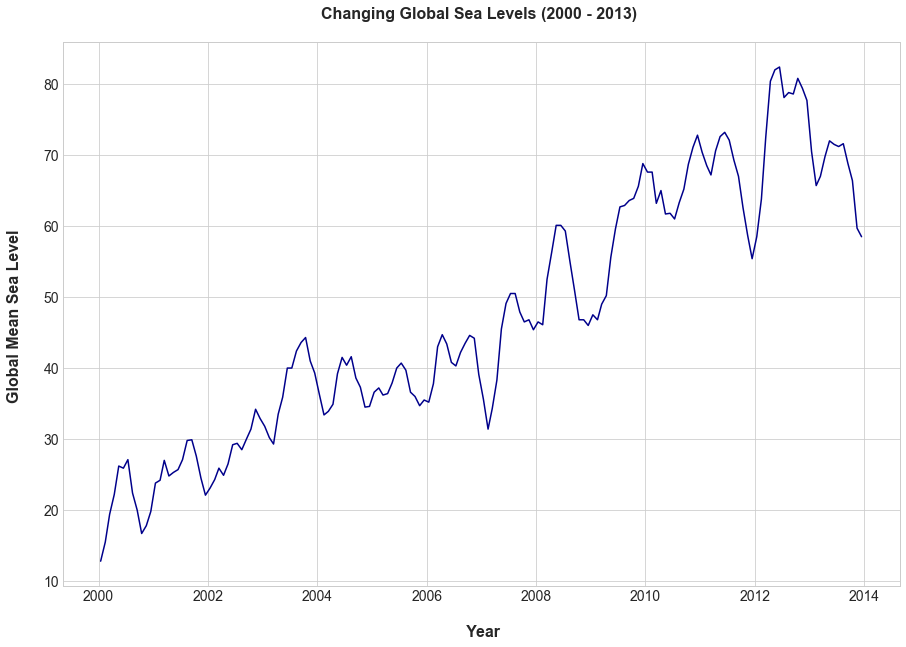

In [37]:
#Set size and plot
plt.figure(figsize = (15, 10))
plt.plot(sea2000.GMSL, color = "darkblue")

#Format plot
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\n Year", fontsize = 16, fontweight = "bold")
plt.ylabel("Global Mean Sea Level \n", fontsize = 16, fontweight = "bold")
plt.title("Changing Global Sea Levels (2000 - 2013) \n", fontsize = 16, fontweight = "bold")

plt.show();

### 2.3 Transform and Test for Stationarity

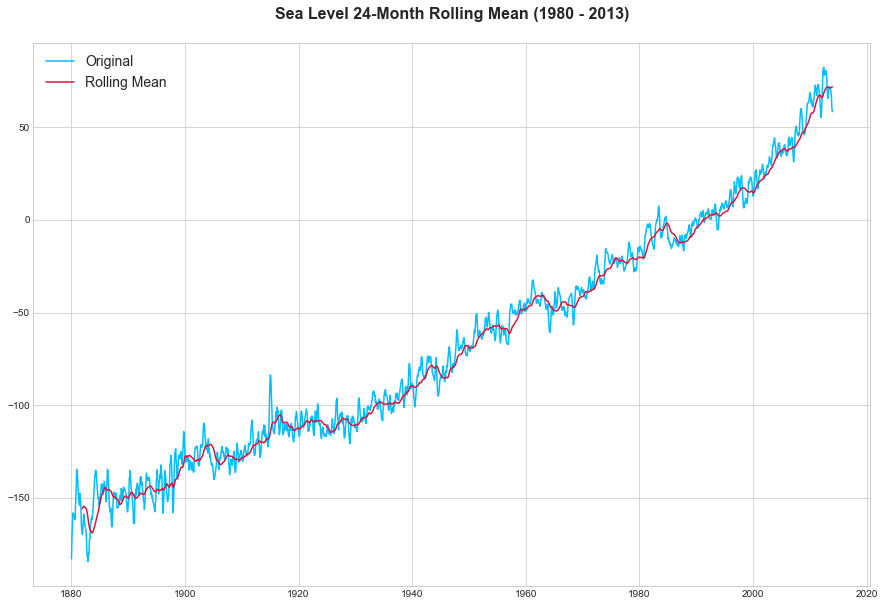

In [38]:
#Explore Rolling mean
rolmean = seadf.rolling(window = 24).mean()

fig = plt.figure(figsize=(15,10))
orig = plt.plot(seadf.GMSL, color = "deepskyblue", label = "Original")
mean = plt.plot(rolmean.GMSL, color = "crimson", label = "Rolling Mean")
plt.legend(fontsize = 14)
plt.title("Sea Level 24-Month Rolling Mean (1980 - 2013)\n", fontsize = 16,fontweight = "bold")
plt.show();

In [39]:
#Remove Trend: subtract rolling mean
seatrend1 = seadf - rolmean

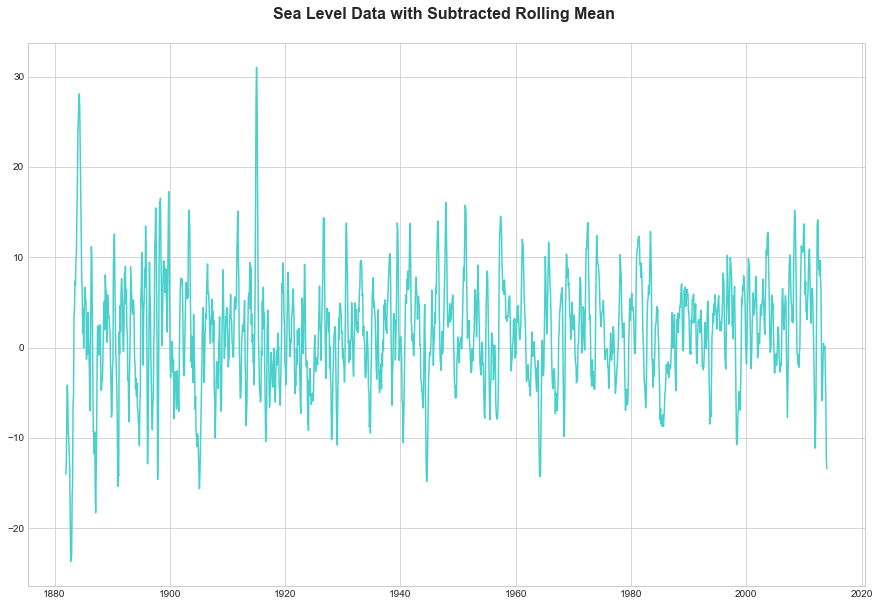

In [40]:
plt.figure(figsize = (15, 10))
plt.plot(seatrend1.GMSL, color = "mediumturquoise")
plt.title("Sea Level Data with Subtracted Rolling Mean \n", fontsize = 16, fontweight = "bold")
plt.show();

In [41]:
#Check seatrend1 for null values
print(seatrend1.isna().sum())
print(seatrend1.loc[seatrend1.GMSL.isna() == True].index)

#Remove null values
seatrend1 = seatrend1.dropna()

GMSL                23
GMSL uncertainty    23
dtype: int64
DatetimeIndex(['1880-01-15', '1880-02-15', '1880-03-15', '1880-04-15',
               '1880-05-15', '1880-06-15', '1880-07-15', '1880-08-15',
               '1880-09-15', '1880-10-15', '1880-11-15', '1880-12-15',
               '1881-01-15', '1881-02-15', '1881-03-15', '1881-04-15',
               '1881-05-15', '1881-06-15', '1881-07-15', '1881-08-15',
               '1881-09-15', '1881-10-15', '1881-11-15'],
              dtype='datetime64[ns]', name='Time', freq=None)


In [42]:
#Create 1-dimensional DF to use in Dickey-Fuller test
sea_ts = seatrend1.drop("GMSL uncertainty", axis = 1)

In [43]:
#Instantiate Dickey-Fuller test to test for stationarity
seatest = adfuller(sea_ts)

#Display test results
dfoutput = pd.Series(seatest[0:4], index = ['Test-Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in seatest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Test-Statistic                -1.065302e+01
p-value                        4.609134e-19
#Lags Used                     1.500000e+01
Number of Observations Used    1.569000e+03
Critical Value (1%)           -3.434525e+00
Critical Value (5%)           -2.863384e+00
Critical Value (10%)          -2.567752e+00
dtype: float64


The p-value is well belo 0.05, therefore the data is stationary.

### 2.4 Autocorrelation and Partial Autocorrelation Functions

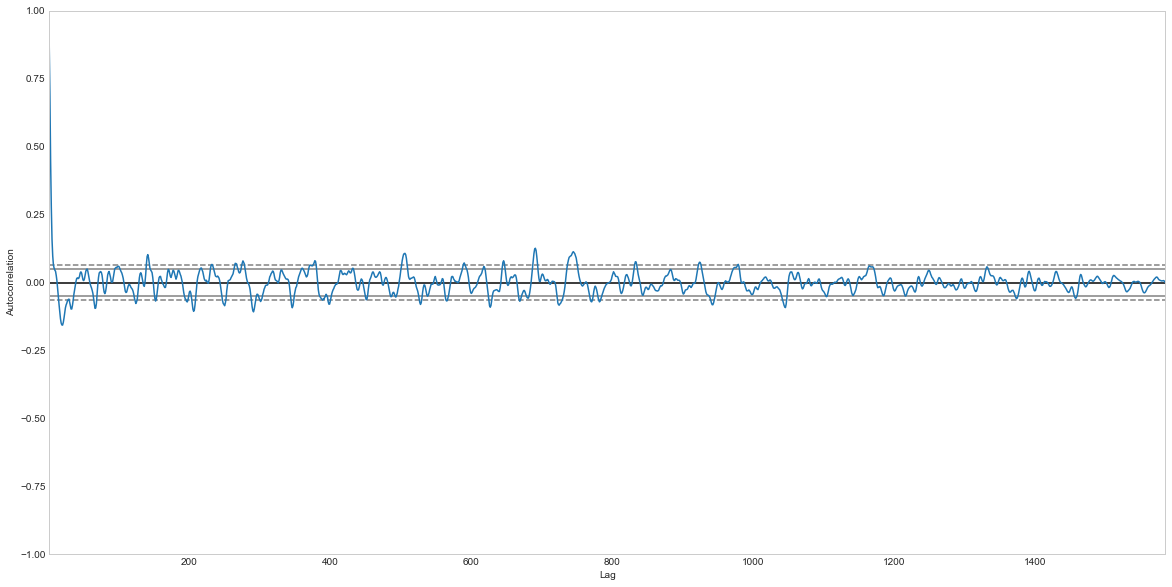

In [44]:
#Plot autocorrelation function
plt.figure(figsize = (20, 10))
pd.plotting.autocorrelation_plot(sea_ts.GMSL);

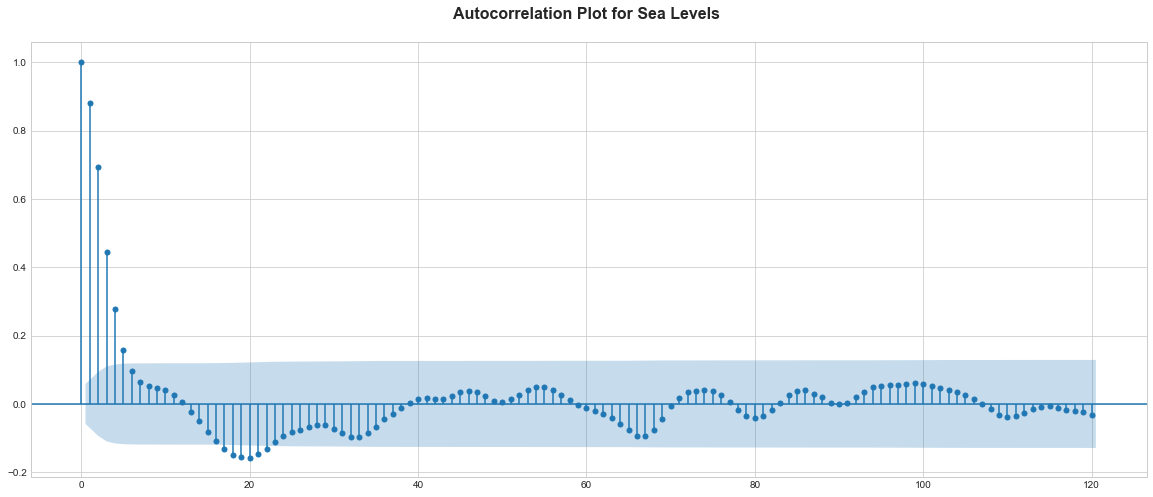

In [45]:
rcParams['figure.figsize'] = 20, 8
plot_acf(sea_ts.GMSL, lags = 120, alpha = .02)
plt.title("Autocorrelation Plot for Sea Levels \n", 
         fontweight = "bold", fontsize = 16);

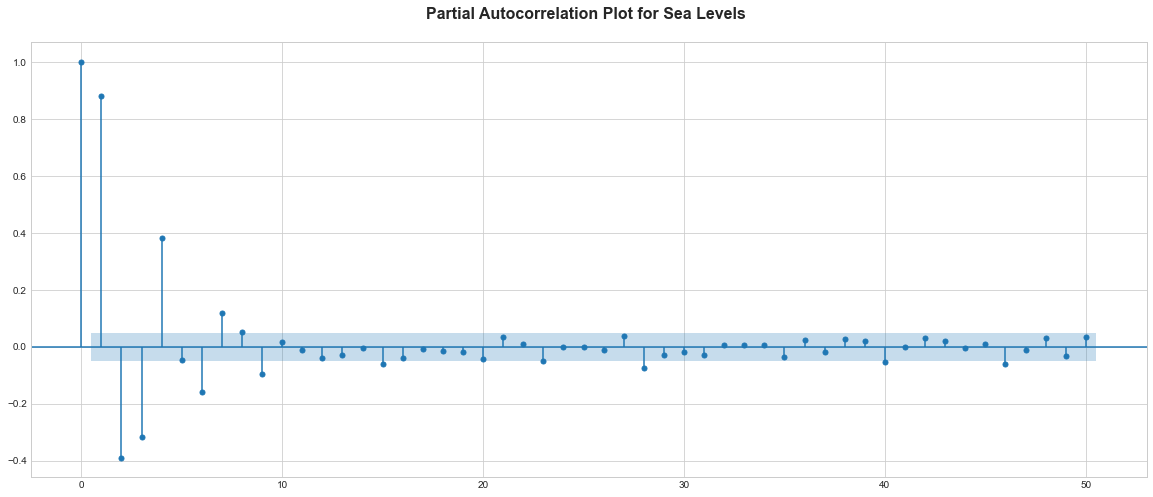

In [46]:
#Plot partial autocorrelation function
plot_pacf(sea_ts.GMSL, lags = 50)
plt.title("Partial Autocorrelation Plot for Sea Levels \n", 
         fontweight = "bold", fontsize = 16);

### 1.5 ARIMA Modeling for Rising Sea Levels

In [47]:
#Generate different combinations for p, d and q parameters
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

In [48]:
#Run a grid with the different parameters to calculate best AIC
res = []
for param in pdq:
    try:
        model = ARIMA(sea_ts.GMSL, order = param)
        output = model.fit()
        res.append([param, output.aic])
        print('ARIMA {} : AIC Calculated ={}'.format(param, output.aic))
    except:
        continue

ARIMA (0, 0, 0) : AIC Calculated =10258.964399522425
ARIMA (0, 0, 1) : AIC Calculated =9016.285618011454
ARIMA (0, 0, 2) : AIC Calculated =7750.893685006636
ARIMA (0, 0, 3) : AIC Calculated =7298.520873637175
ARIMA (0, 1, 0) : AIC Calculated =7910.360890554826
ARIMA (0, 1, 1) : AIC Calculated =7806.525881652501
ARIMA (0, 1, 2) : AIC Calculated =7204.786554689235
ARIMA (0, 1, 3) : AIC Calculated =7168.751010979653
ARIMA (0, 2, 0) : AIC Calculated =8395.465126668487
ARIMA (0, 2, 1) : AIC Calculated =7915.736421736097
ARIMA (0, 2, 2) : AIC Calculated =7811.6092715502145
ARIMA (0, 2, 3) : AIC Calculated =7208.99812652334
ARIMA (0, 3, 0) : AIC Calculated =10082.1674995549
ARIMA (0, 3, 1) : AIC Calculated =8400.550228878838
ARIMA (0, 3, 2) : AIC Calculated =7932.210307400363
ARIMA (0, 3, 3) : AIC Calculated =7828.826345385842
ARIMA (1, 0, 0) : AIC Calculated =7832.556032348063
ARIMA (1, 0, 1) : AIC Calculated =7698.105789201953
ARIMA (1, 0, 2) : AIC Calculated =6973.409577713709
ARIMA (1, 0,

In [49]:
# Find the parameters with minimal AIC value
resdf = pd.DataFrame(res, columns=['pdq', 'aic'])
resdf.loc[resdf['aic'].idxmin()]

pdq    (3, 0, 3)
aic      6952.39
Name: 51, dtype: object

In [50]:
sea_model = ARIMA(sea_ts.GMSL, order = (3, 0, 3)).fit()
sea_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   GMSL   No. Observations:                 1585
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -3468.195
Date:                Thu, 29 Apr 2021   AIC                           6952.390
Time:                        15:54:20   BIC                           6995.337
Sample:                             0   HQIC                          6968.346
                               - 1585                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5681      0.390      4.024      0.000       0.804       2.332
ar.L1          0.3931      0.152      2.591      0.010       0.096       0.690
ar.L2          0.3626      0.100      3.613      0.000       0.166       0.559
ar.L3         -0.1696      0.032     -5.364      0.000      -0.232      -0.108
ma.L1          0.8958      0.154      5.833      0.000       0.595       1.197
ma.L2          0.8542      0.099      8.594      0.000       0.659       1.049
ma.L3          0.2286      0.119      1.924      0.054      -0.004       0.461
sigma2         4.6464      0.137     33.995      0.000       4.378       4.914
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                67.62
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
mean_squared_error(sea_ts.GMSL, sea_model.predict())

4.785281011382074

In [52]:
r2_score(sea_ts.GMSL, sea_model.predict())

0.8733828443345872

### 2.6 Evaluate the Model

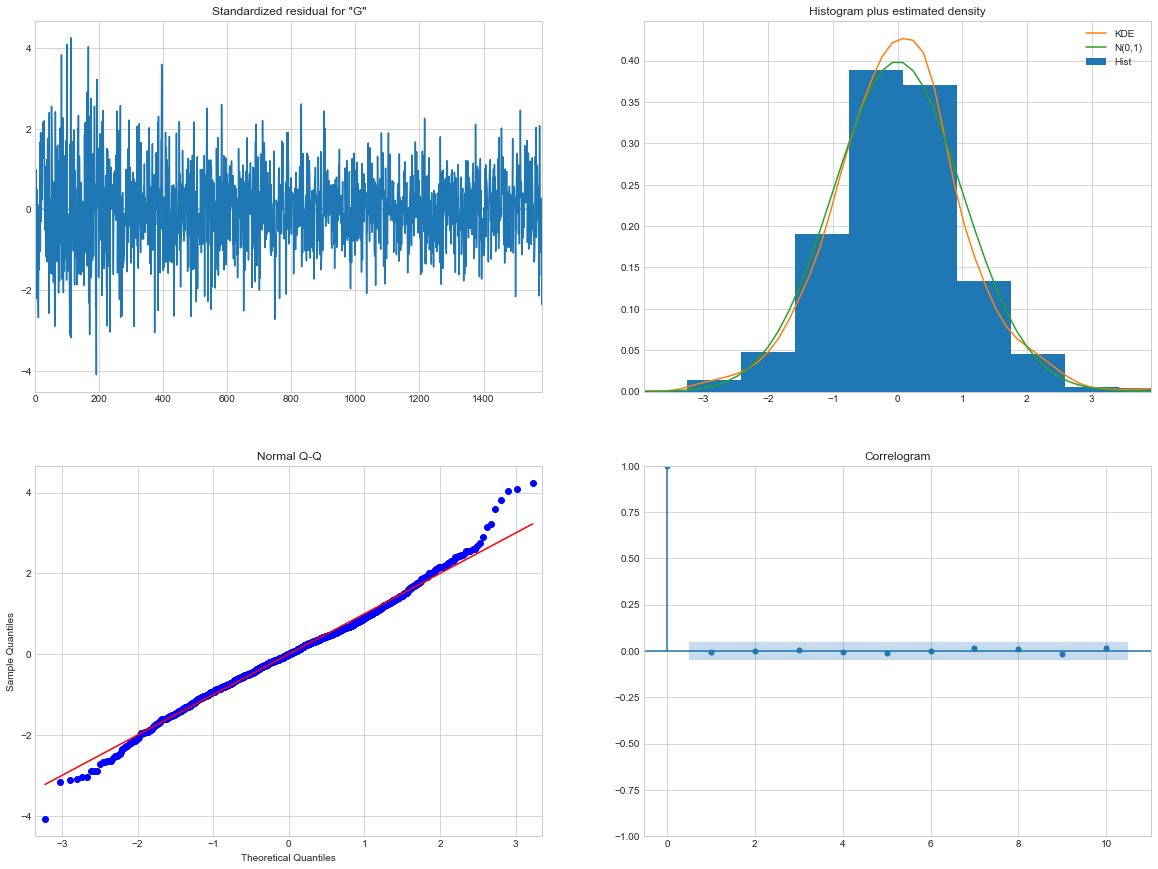

In [53]:
#Check diagnostics
sea_model.plot_diagnostics(figsize = (20, 15));

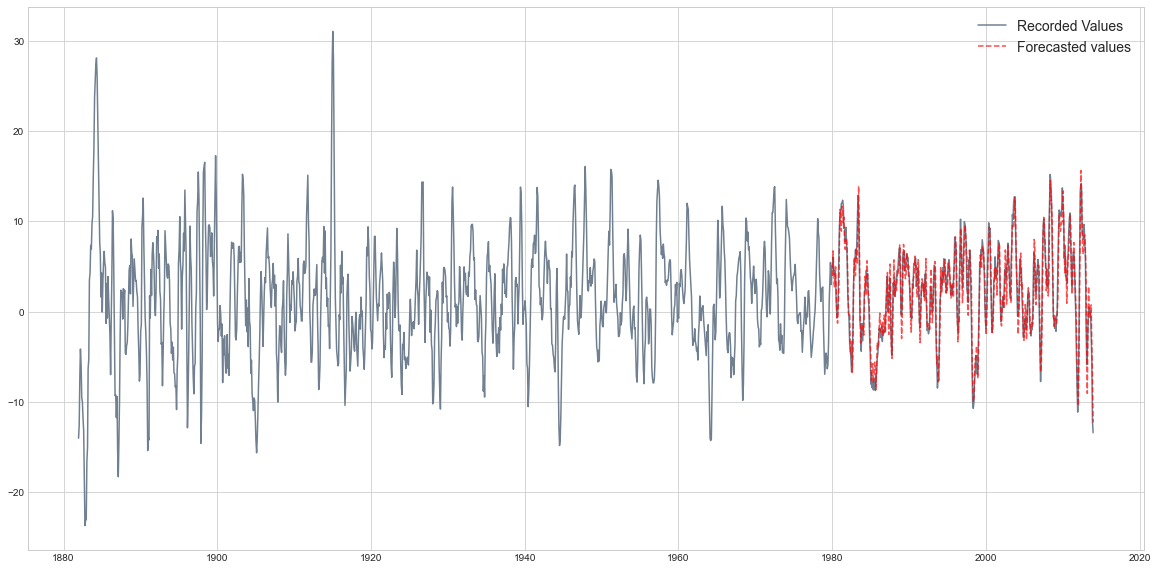

In [54]:
#Generate predictions for global temperatures
sea_pred = sea_model.predict()

#Plot real v. predicted values for model evaluation
fig = plt.figure(figsize = (20, 10))
real = plt.plot(sea_ts.GMSL, color = "slategrey", label = "Recorded Values")
predicted = plt.plot(sea_pred['1980':], label = "Forecasted values", color = "red", linestyle = 'dashed', alpha = .7)
plt.legend(fontsize = 14)

plt.show()

# III. Extreme Weather Events in the United States

### 3.1 Import Datasets and Define Useful Functions

In [55]:
#Import Storms Datasets for all years since 1990
#2006 Data missing

storms1990 = pd.read_csv("Data/StormEvents_details-1990.csv.gz")
storms1991 = pd.read_csv("Data/StormEvents_details-1991.csv.gz")
storms1992 = pd.read_csv("Data/StormEvents_details-1992.csv.gz")
storms1993 = pd.read_csv("Data/StormEvents_details-1993.csv.gz")
storms1994 = pd.read_csv("Data/StormEvents_details-1994.csv.gz")
storms1995 = pd.read_csv("Data/StormEvents_details-1995.csv.gz")
storms1996 = pd.read_csv("Data/StormEvents_details-1996.csv.gz")
storms1997 = pd.read_csv("Data/StormEvents_details-1997.csv.gz")
storms1998 = pd.read_csv("Data/StormEvents_details-1998.csv.gz")
storms1999 = pd.read_csv("Data/StormEvents_details-1999.csv.gz")
storms2000 = pd.read_csv("Data/StormEvents_details-2000.csv.gz")
storms2001 = pd.read_csv("Data/StormEvents_details-2001.csv.gz")
storms2002 = pd.read_csv("Data/StormEvents_details-2002.csv.gz")
storms2003 = pd.read_csv("Data/StormEvents_details-2003.csv.gz")
storms2004 = pd.read_csv("Data/StormEvents_details-2004.csv.gz")
storms2005 = pd.read_csv("Data/StormEvents_details-2005.csv.gz")
storms2007 = pd.read_csv("Data/StormEvents_details-2007.csv.gz")
storms2008 = pd.read_csv("Data/StormEvents_details-2008.csv.gz")
storms2009 = pd.read_csv("Data/StormEvents_details-2009.csv.gz")
storms2010 = pd.read_csv("Data/StormEvents_details-2010.csv.gz")
storms2011 = pd.read_csv("Data/StormEvents_details-2011.csv.gz")
storms2012 = pd.read_csv("Data/StormEvents_details-2012.csv.gz")
storms2013 = pd.read_csv("Data/StormEvents_details-2013.csv.gz")
storms2014 = pd.read_csv("Data/StormEvents_details-2014.csv.gz")
storms2015 = pd.read_csv("Data/StormEvents_details-2015.csv.gz")
storms2016 = pd.read_csv("Data/StormEvents_details-2016.csv.gz")
storms2017 = pd.read_csv("Data/StormEvents_details-2017.csv.gz")
storms2018 = pd.read_csv("Data/StormEvents_details-2018.csv.gz")
storms2019 = pd.read_csv("Data/StormEvents_details-2019.csv.gz")
storms2020 = pd.read_csv("Data/StormEvents_details-2020.csv.gz")

In [56]:
#Preview one of the imported DFs
display(storms2020.info())
display(storms2020.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57001 entries, 0 to 57000
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BEGIN_YEARMONTH     57001 non-null  int64  
 1   BEGIN_DAY           57001 non-null  int64  
 2   BEGIN_TIME          57001 non-null  int64  
 3   END_YEARMONTH       57001 non-null  int64  
 4   END_DAY             57001 non-null  int64  
 5   END_TIME            57001 non-null  int64  
 6   EPISODE_ID          57001 non-null  int64  
 7   EVENT_ID            57001 non-null  int64  
 8   STATE               57001 non-null  object 
 9   STATE_FIPS          57001 non-null  int64  
 10  YEAR                57001 non-null  int64  
 11  MONTH_NAME          57001 non-null  object 
 12  EVENT_TYPE          57001 non-null  object 
 13  CZ_TYPE             57001 non-null  object 
 14  CZ_FIPS             57001 non-null  int64  
 15  CZ_NAME             57001 non-null  object 
 16  WFO 

None

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202006,24,1620,202006,24,1620,149684,902190,GEORGIA,13,2020,June,Thunderstorm Wind,C,321,WORTH,TAE,24-JUN-20 16:20:00,EST-5,24-JUN-20 16:20:00,0,0,0,0,0.00K,0.00K,911 Call Center,50.00,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,DOLES,1.0,W,DOLES,31.7000,-83.8900,31.7000,-83.8900,"As is typical during summer, scattered afterno...",A power line was blown down on Highway 32W. H...,CSV
1,202005,25,1700,202005,25,2000,147310,885808,WEST VIRGINIA,54,2020,May,Flash Flood,C,101,WEBSTER,RLX,25-MAY-20 17:00:00,EST-5,25-MAY-20 20:00:00,0,0,0,0,3.00K,0.00K,Department of Highways,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NNW,ERBACON,2.0,E,ERBACON,38.5367,-80.5887,38.5186,-80.5378,Scattered and disorganized convection develope...,County Roads 9 and 32 near the town of Erbacon...,CSV
2,202002,6,1600,202002,7,2100,146077,877747,NEW YORK,36,2020,February,Winter Storm,Z,41,NORTHERN SARATOGA,ALY,06-FEB-20 16:00:00,EST-5,07-FEB-20 21:00:00,0,0,0,0,NaN,NaN,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multiple rounds of wintry precipitation impact...,NaN,CSV
3,202005,22,1931,202005,22,1931,147059,883975,ALABAMA,1,2020,May,Hail,C,95,MARSHALL,HUN,22-MAY-20 19:31:00,CST-6,22-MAY-20 19:31:00,0,0,0,0,0.00K,0.00K,Emergency Manager,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,HORTON,0.0,N,HORTON,34.2000,-86.3000,34.2000,-86.3000,Scattered thunderstorms during the evening hou...,Hail up to golf ball sized was reported on Oak...,CSV
4,202005,22,1932,202005,22,1932,147059,883976,ALABAMA,1,2020,May,Hail,C,95,MARSHALL,HUN,22-MAY-20 19:32:00,CST-6,22-MAY-20 19:32:00,0,0,0,0,0.00K,0.00K,Emergency Manager,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,HORTON,0.0,N,HORTON,34.2000,-86.3000,34.2000,-86.3000,Scattered thunderstorms during the evening hou...,Hail up to golf ball sized was reported on Hor...,CSV


In [57]:
def focusdata(stormdf):
    """This functiong takes in the storms dataframes and removes all columns outside the scope of interest of this 
    study"""
    
    #Create list of column of interest
    columns_of_interest = ['BEGIN_DAY','YEAR', 'MONTH_NAME', 'STATE', 'EVENT_TYPE', 'INJURIES_DIRECT', 
                                 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 
                              'DAMAGE_CROPS']
    #Iterate through columns and remove those not included in the defined list
    for column in stormdf.columns:
        if column not in columns_of_interest:
            stormdf.drop(column, axis = 1, inplace = True)

In [58]:
def cleanDates(stormdf):
    """This function takes a storm DataFrame as input, creates a new 'DATE' column, which 
    it then transforms into a Datetime index for time series analysis"""
    
    #Create a reference dictionnary for Month Names
    month_names = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
               'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
    
    date = []
    
    #Put together month and year entries 
    for entry in stormdf.values:
        year = entry[2]
        month = month_names[entry[3]]
        day = entry[0]
        date.append(str(day) + '-' + str(month) + '-' + str(year))
        
    stormdf['DATE'] = date #create new 'DATE' column
    stormdf.DATE = pd.to_datetime(stormdf.DATE, yearfirst = True) #Convert 'DATE' to datetime object
    stormdf.set_index('DATE', inplace = True) #Set DATE as new index
    stormdf.drop(['BEGIN_DAY','YEAR', 'MONTH_NAME'], axis = 1, inplace = True) #Drop old date-ref columns
    stormdf.sort_values(by="DATE", inplace = True) #Sort the DataFrame in chronological order

In [59]:
def convertEntryTypes(damage_values):
    """This function sorts through the values in the DAMAGES columns of the storms DataFrames, 
    converting all monetary values to their equivalent float values"""
    
    #Fill in null values
    damage_values = damage_values.fillna(0)
    
    #Remove all non-numerical characters and transform number to numerical equivalent
    for(index, value) in enumerate(damage_values.values):
        if value != 0:
            if 'K' in value:
                value = value.replace('K', '')
                if value != '':
                    value = float(value) * 1000
                else:
                    value = 0
            elif 'M' in value: 
                value = value.replace('M', '')
                value = float(value) * 1000000
            elif 'B' in value:
                value = value.replace('B', '')
                value = float(value) *1000000000
            elif '?' or 'h' in value:
                value = 0
            damage_values.values[index] = value

    return damage_values

In [60]:
def cleanDamages(stormdf):
    """This function cleans the DAMAGES columns data entries and converts them to float type"""
    
    #Create damage arrays for crops and property to transform
    crop_damage = stormdf.DAMAGE_CROPS.astype(str)
    prop_damage = stormdf.DAMAGE_PROPERTY.astype(str)
    
    #Run through convertEntryTypes function to clean up numbers data
    crop_damage = convertEntryTypes(crop_damage)
    prop_damage = convertEntryTypes(prop_damage)

    #Update the DAMAGER_PROPERTY and DAMAGE_CROPS Series
    stormdf.DAMAGE_PROPERTY = prop_damage.astype(float)
    stormdf.DAMAGE_CROPS = crop_damage.astype(float)

### 3.2 Clean up Data

In [61]:
#Create list of all loaded storms dataframes for easy access
dflist = [storms1990, storms1991, storms1992, storms1993, storms1994, storms1995, storms1996, storms1997, 
             storms1998, storms1999, storms2000, storms2001, storms2002, storms2003, storms2004, storms2005, storms2007, 
             storms2008, storms2009, storms2010, storms2011, storms2012, storms2013, storms2014, storms2015, 
             storms2016, storms2017, storms2018, storms2019, storms2020]

In [62]:
#Focus the data in all storms dataframes by running them through focusdata function
for df in dflist: 
    df = focusdata(df)

In [63]:
#Set Date index 
for df in dflist: 
    cleanDates(df)

In [64]:
#Clean the Damages columns (property & crops)
for df in dflist:
    cleanDamages(df)

In [65]:
#Include a STORM_COUNT columns, to use for later frequency DataFrames
for df in dflist:
    df['STORM_COUNT'] = np.ones(len(df))

In [66]:
for df in dflist:
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10945 entries, 1990-01-01 to 1990-12-30
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              10945 non-null  object 
 1   EVENT_TYPE         10945 non-null  object 
 2   INJURIES_DIRECT    10945 non-null  int64  
 3   INJURIES_INDIRECT  10945 non-null  int64  
 4   DEATHS_DIRECT      10945 non-null  int64  
 5   DEATHS_INDIRECT    10945 non-null  int64  
 6   DAMAGE_PROPERTY    10945 non-null  float64
 7   DAMAGE_CROPS       10945 non-null  float64
 8   STORM_COUNT        10945 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 855.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12516 entries, 1991-01-03 to 1991-12-29
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              12516 non-null  object 
 1   EVENT_TYPE         12516 non-null  object 
 2   INJURIES_DIRECT    12516 non-null  int64  
 3   INJURIES_INDIRECT  12516 non-null  int64  
 4   DEATHS_DIRECT      12516 non-null  int64  
 5   DEATHS_INDIRECT    12516 non-null  int64  
 6   DAMAGE_PROPERTY    12516 non-null  float64
 7   DAMAGE_CROPS       12516 non-null  float64
 8   STORM_COUNT        12516 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 977.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13534 entries, 1992-01-04 to 1992-12-30
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              13534 non-null  object 
 1   EVENT_TYPE         13534 non-null  object 
 2   INJURIES_DIRECT    13534 non-null  int64  
 3   INJURIES_INDIRECT  13534 non-null  int64  
 4   DEATHS_DIRECT      13534 non-null  int64  
 5   DEATHS_INDIRECT    13534 non-null  int64  
 6   DAMAGE_PROPERTY    13534 non-null  float64
 7   DAMAGE_CROPS       13534 non-null  float64
 8   STORM_COUNT        13534 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8664 entries, 1993-01-02 to 1993-12-23
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              8664 non-null   object 
 1   EVENT_TYPE         8664 non-null   object 
 2   INJURIES_DIRECT    8664 non-null   int64  
 3   INJURIES_INDIRECT  8664 non-null   int64  
 4   DEATHS_DIRECT      8664 non-null   int64  
 5   DEATHS_INDIRECT    8664 non-null   int64  
 6   DAMAGE_PROPERTY    8664 non-null   float64
 7   DAMAGE_CROPS       8664 non-null   float64
 8   STORM_COUNT        8664 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 676.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15627 entries, 1994-01-03 to 1994-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              15627 non-null  object 
 1   EVENT_TYPE         15627 non-null  object 
 2   INJURIES_DIRECT    15627 non-null  int64  
 3   INJURIES_INDIRECT  15627 non-null  int64  
 4   DEATHS_DIRECT      15627 non-null  int64  
 5   DEATHS_INDIRECT    15627 non-null  int64  
 6   DAMAGE_PROPERTY    15627 non-null  float64
 7   DAMAGE_CROPS       15627 non-null  float64
 8   STORM_COUNT        15627 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20461 entries, 1995-01-02 to 1995-12-23
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              20461 non-null  object 
 1   EVENT_TYPE         20461 non-null  object 
 2   INJURIES_DIRECT    20461 non-null  int64  
 3   INJURIES_INDIRECT  20461 non-null  int64  
 4   DEATHS_DIRECT      20461 non-null  int64  
 5   DEATHS_INDIRECT    20461 non-null  int64  
 6   DAMAGE_PROPERTY    20461 non-null  float64
 7   DAMAGE_CROPS       20461 non-null  float64
 8   STORM_COUNT        20461 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48561 entries, 1996-01-01 to 1996-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              48561 non-null  object 
 1   EVENT_TYPE         48561 non-null  object 
 2   INJURIES_DIRECT    48561 non-null  int64  
 3   INJURIES_INDIRECT  48561 non-null  int64  
 4   DEATHS_DIRECT      48561 non-null  int64  
 5   DEATHS_INDIRECT    48561 non-null  int64  
 6   DAMAGE_PROPERTY    48561 non-null  float64
 7   DAMAGE_CROPS       48561 non-null  float64
 8   STORM_COUNT        48561 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 3.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41991 entries, 1997-01-01 to 1997-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              41991 non-null  object 
 1   EVENT_TYPE         41991 non-null  object 
 2   INJURIES_DIRECT    41991 non-null  int64  
 3   INJURIES_INDIRECT  41991 non-null  int64  
 4   DEATHS_DIRECT      41991 non-null  int64  
 5   DEATHS_INDIRECT    41991 non-null  int64  
 6   DAMAGE_PROPERTY    41991 non-null  float64
 7   DAMAGE_CROPS       41991 non-null  float64
 8   STORM_COUNT        41991 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 3.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50973 entries, 1998-01-01 to 1998-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              50973 non-null  object 
 1   EVENT_TYPE         50973 non-null  object 
 2   INJURIES_DIRECT    50973 non-null  int64  
 3   INJURIES_INDIRECT  50973 non-null  int64  
 4   DEATHS_DIRECT      50973 non-null  int64  
 5   DEATHS_INDIRECT    50973 non-null  int64  
 6   DAMAGE_PROPERTY    50973 non-null  float64
 7   DAMAGE_CROPS       50973 non-null  float64
 8   STORM_COUNT        50973 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 3.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46383 entries, 1999-01-01 to 1999-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              46383 non-null  object 
 1   EVENT_TYPE         46383 non-null  object 
 2   INJURIES_DIRECT    46383 non-null  int64  
 3   INJURIES_INDIRECT  46383 non-null  int64  
 4   DEATHS_DIRECT      46383 non-null  int64  
 5   DEATHS_INDIRECT    46383 non-null  int64  
 6   DAMAGE_PROPERTY    46383 non-null  float64
 7   DAMAGE_CROPS       46383 non-null  float64
 8   STORM_COUNT        46383 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 3.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52007 entries, 2000-01-01 to 2000-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              52007 non-null  object 
 1   EVENT_TYPE         52007 non-null  object 
 2   INJURIES_DIRECT    52007 non-null  int64  
 3   INJURIES_INDIRECT  52007 non-null  int64  
 4   DEATHS_DIRECT      52007 non-null  int64  
 5   DEATHS_INDIRECT    52007 non-null  int64  
 6   DAMAGE_PROPERTY    52007 non-null  float64
 7   DAMAGE_CROPS       52007 non-null  float64
 8   STORM_COUNT        52007 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48875 entries, 2001-01-01 to 2001-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              48875 non-null  object 
 1   EVENT_TYPE         48875 non-null  object 
 2   INJURIES_DIRECT    48875 non-null  int64  
 3   INJURIES_INDIRECT  48875 non-null  int64  
 4   DEATHS_DIRECT      48875 non-null  int64  
 5   DEATHS_INDIRECT    48875 non-null  int64  
 6   DAMAGE_PROPERTY    48875 non-null  float64
 7   DAMAGE_CROPS       48875 non-null  float64
 8   STORM_COUNT        48875 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 3.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50936 entries, 2002-01-01 to 2002-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              50936 non-null  object 
 1   EVENT_TYPE         50936 non-null  object 
 2   INJURIES_DIRECT    50936 non-null  int64  
 3   INJURIES_INDIRECT  50936 non-null  int64  
 4   DEATHS_DIRECT      50936 non-null  int64  
 5   DEATHS_INDIRECT    50936 non-null  int64  
 6   DAMAGE_PROPERTY    50936 non-null  float64
 7   DAMAGE_CROPS       50936 non-null  float64
 8   STORM_COUNT        50936 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 3.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52956 entries, 2003-01-01 to 2003-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              52955 non-null  object 
 1   EVENT_TYPE         52956 non-null  object 
 2   INJURIES_DIRECT    52956 non-null  int64  
 3   INJURIES_INDIRECT  52956 non-null  int64  
 4   DEATHS_DIRECT      52956 non-null  int64  
 5   DEATHS_INDIRECT    52956 non-null  int64  
 6   DAMAGE_PROPERTY    52956 non-null  float64
 7   DAMAGE_CROPS       52956 non-null  float64
 8   STORM_COUNT        52956 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52409 entries, 2004-01-01 to 2004-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              52409 non-null  object 
 1   EVENT_TYPE         52409 non-null  object 
 2   INJURIES_DIRECT    52409 non-null  int64  
 3   INJURIES_INDIRECT  52409 non-null  int64  
 4   DEATHS_DIRECT      52409 non-null  int64  
 5   DEATHS_INDIRECT    52409 non-null  int64  
 6   DAMAGE_PROPERTY    52409 non-null  float64
 7   DAMAGE_CROPS       52409 non-null  float64
 8   STORM_COUNT        52409 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53976 entries, 2005-01-01 to 2005-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              53976 non-null  object 
 1   EVENT_TYPE         53976 non-null  object 
 2   INJURIES_DIRECT    53976 non-null  int64  
 3   INJURIES_INDIRECT  53976 non-null  int64  
 4   DEATHS_DIRECT      53976 non-null  int64  
 5   DEATHS_INDIRECT    53976 non-null  int64  
 6   DAMAGE_PROPERTY    53976 non-null  float64
 7   DAMAGE_CROPS       53976 non-null  float64
 8   STORM_COUNT        53976 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59010 entries, 2007-01-01 to 2007-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              59010 non-null  object 
 1   EVENT_TYPE         59010 non-null  object 
 2   INJURIES_DIRECT    59010 non-null  int64  
 3   INJURIES_INDIRECT  59010 non-null  int64  
 4   DEATHS_DIRECT      59010 non-null  int64  
 5   DEATHS_INDIRECT    59010 non-null  int64  
 6   DAMAGE_PROPERTY    59010 non-null  float64
 7   DAMAGE_CROPS       59010 non-null  float64
 8   STORM_COUNT        59010 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71190 entries, 2008-01-01 to 2008-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              71190 non-null  object 
 1   EVENT_TYPE         71190 non-null  object 
 2   INJURIES_DIRECT    71190 non-null  int64  
 3   INJURIES_INDIRECT  71190 non-null  int64  
 4   DEATHS_DIRECT      71190 non-null  int64  
 5   DEATHS_INDIRECT    71190 non-null  int64  
 6   DAMAGE_PROPERTY    71190 non-null  float64
 7   DAMAGE_CROPS       71190 non-null  float64
 8   STORM_COUNT        71190 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 5.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57398 entries, 2009-01-01 to 2009-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              57398 non-null  object 
 1   EVENT_TYPE         57398 non-null  object 
 2   INJURIES_DIRECT    57398 non-null  int64  
 3   INJURIES_INDIRECT  57398 non-null  int64  
 4   DEATHS_DIRECT      57398 non-null  int64  
 5   DEATHS_INDIRECT    57398 non-null  int64  
 6   DAMAGE_PROPERTY    57398 non-null  float64
 7   DAMAGE_CROPS       57398 non-null  float64
 8   STORM_COUNT        57398 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62807 entries, 2010-01-01 to 2010-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              62807 non-null  object 
 1   EVENT_TYPE         62807 non-null  object 
 2   INJURIES_DIRECT    62807 non-null  int64  
 3   INJURIES_INDIRECT  62807 non-null  int64  
 4   DEATHS_DIRECT      62807 non-null  int64  
 5   DEATHS_INDIRECT    62807 non-null  int64  
 6   DAMAGE_PROPERTY    62807 non-null  float64
 7   DAMAGE_CROPS       62807 non-null  float64
 8   STORM_COUNT        62807 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79091 entries, 2011-01-01 to 2011-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              79091 non-null  object 
 1   EVENT_TYPE         79091 non-null  object 
 2   INJURIES_DIRECT    79091 non-null  int64  
 3   INJURIES_INDIRECT  79091 non-null  int64  
 4   DEATHS_DIRECT      79091 non-null  int64  
 5   DEATHS_INDIRECT    79091 non-null  int64  
 6   DAMAGE_PROPERTY    79091 non-null  float64
 7   DAMAGE_CROPS       79091 non-null  float64
 8   STORM_COUNT        79091 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 6.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64503 entries, 2012-01-01 to 2012-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              64503 non-null  object 
 1   EVENT_TYPE         64503 non-null  object 
 2   INJURIES_DIRECT    64503 non-null  int64  
 3   INJURIES_INDIRECT  64503 non-null  int64  
 4   DEATHS_DIRECT      64503 non-null  int64  
 5   DEATHS_INDIRECT    64503 non-null  int64  
 6   DAMAGE_PROPERTY    64503 non-null  float64
 7   DAMAGE_CROPS       64503 non-null  float64
 8   STORM_COUNT        64503 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59985 entries, 2013-01-01 to 2013-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              59985 non-null  object 
 1   EVENT_TYPE         59985 non-null  object 
 2   INJURIES_DIRECT    59985 non-null  int64  
 3   INJURIES_INDIRECT  59985 non-null  int64  
 4   DEATHS_DIRECT      59985 non-null  int64  
 5   DEATHS_INDIRECT    59985 non-null  int64  
 6   DAMAGE_PROPERTY    59985 non-null  float64
 7   DAMAGE_CROPS       59985 non-null  float64
 8   STORM_COUNT        59985 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59465 entries, 2014-01-01 to 2014-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              59465 non-null  object 
 1   EVENT_TYPE         59465 non-null  object 
 2   INJURIES_DIRECT    59465 non-null  int64  
 3   INJURIES_INDIRECT  59465 non-null  int64  
 4   DEATHS_DIRECT      59465 non-null  int64  
 5   DEATHS_INDIRECT    59465 non-null  int64  
 6   DAMAGE_PROPERTY    59465 non-null  float64
 7   DAMAGE_CROPS       59465 non-null  float64
 8   STORM_COUNT        59465 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57788 entries, 2015-01-01 to 2015-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              57788 non-null  object 
 1   EVENT_TYPE         57788 non-null  object 
 2   INJURIES_DIRECT    57788 non-null  int64  
 3   INJURIES_INDIRECT  57788 non-null  int64  
 4   DEATHS_DIRECT      57788 non-null  int64  
 5   DEATHS_INDIRECT    57788 non-null  int64  
 6   DAMAGE_PROPERTY    57788 non-null  float64
 7   DAMAGE_CROPS       57788 non-null  float64
 8   STORM_COUNT        57788 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56003 entries, 2016-01-01 to 2016-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              56003 non-null  object 
 1   EVENT_TYPE         56003 non-null  object 
 2   INJURIES_DIRECT    56003 non-null  int64  
 3   INJURIES_INDIRECT  56003 non-null  int64  
 4   DEATHS_DIRECT      56003 non-null  int64  
 5   DEATHS_INDIRECT    56003 non-null  int64  
 6   DAMAGE_PROPERTY    56003 non-null  float64
 7   DAMAGE_CROPS       56003 non-null  float64
 8   STORM_COUNT        56003 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57025 entries, 2017-01-01 to 2017-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              57025 non-null  object 
 1   EVENT_TYPE         57025 non-null  object 
 2   INJURIES_DIRECT    57025 non-null  int64  
 3   INJURIES_INDIRECT  57025 non-null  int64  
 4   DEATHS_DIRECT      57025 non-null  int64  
 5   DEATHS_INDIRECT    57025 non-null  int64  
 6   DAMAGE_PROPERTY    57025 non-null  float64
 7   DAMAGE_CROPS       57025 non-null  float64
 8   STORM_COUNT        57025 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62693 entries, 2018-01-01 to 2018-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              62693 non-null  object 
 1   EVENT_TYPE         62693 non-null  object 
 2   INJURIES_DIRECT    62693 non-null  int64  
 3   INJURIES_INDIRECT  62693 non-null  int64  
 4   DEATHS_DIRECT      62693 non-null  int64  
 5   DEATHS_INDIRECT    62693 non-null  int64  
 6   DAMAGE_PROPERTY    62693 non-null  float64
 7   DAMAGE_CROPS       62693 non-null  float64
 8   STORM_COUNT        62693 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67652 entries, 2019-01-01 to 2019-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              67652 non-null  object 
 1   EVENT_TYPE         67652 non-null  object 
 2   INJURIES_DIRECT    67652 non-null  int64  
 3   INJURIES_INDIRECT  67652 non-null  int64  
 4   DEATHS_DIRECT      67652 non-null  int64  
 5   DEATHS_INDIRECT    67652 non-null  int64  
 6   DAMAGE_PROPERTY    67652 non-null  float64
 7   DAMAGE_CROPS       67652 non-null  float64
 8   STORM_COUNT        67652 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 5.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57001 entries, 2020-01-01 to 2020-12-11
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              57001 non-null  object 
 1   EVENT_TYPE         57001 non-null  object 
 2   INJURIES_DIRECT    57001 non-null  int64  
 3   INJURIES_INDIRECT  57001 non-null  int64  
 4   DEATHS_DIRECT      57001 non-null  int64  
 5   DEATHS_INDIRECT    57001 non-null  int64  
 6   DAMAGE_PROPERTY    57001 non-null  float64
 7   DAMAGE_CROPS       57001 non-null  float64
 8   STORM_COUNT        57001 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.3+ MB


None

In [67]:
#Create a large 'general detail' storms DataFrame spanning 1990-2020
genstorm = pd.concat(dflist)

#Preview new DataFrame
display(genstorm.head())
display(genstorm.info())

,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,STORM_COUNT
DATE,,,,,,,,,
1990-01-01,NORTH CAROLINA,Thunderstorm Wind,0,0,0,0,0.0,0.0,1.0
1990-01-02,TEXAS,Thunderstorm Wind,0,0,0,0,0.0,0.0,1.0
1990-01-02,TEXAS,Thunderstorm Wind,0,0,0,0,0.0,0.0,1.0
1990-01-02,TEXAS,Thunderstorm Wind,0,0,0,0,0.0,0.0,1.0
1990-01-02,TEXAS,Hail,0,0,0,0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1452425 entries, 1990-01-01 to 2020-12-11
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   STATE              1452424 non-null  object 
 1   EVENT_TYPE         1452425 non-null  object 
 2   INJURIES_DIRECT    1452425 non-null  int64  
 3   INJURIES_INDIRECT  1452425 non-null  int64  
 4   DEATHS_DIRECT      1452425 non-null  int64  
 5   DEATHS_INDIRECT    1452425 non-null  int64  
 6   DAMAGE_PROPERTY    1452425 non-null  float64
 7   DAMAGE_CROPS       1452425 non-null  float64
 8   STORM_COUNT        1452425 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 110.8+ MB


None

In [68]:
#Preview types of Extreme weather recorded
genstorm.EVENT_TYPE.unique()

array(['Thunderstorm Wind', 'Hail', 'Tornado',
       'TORNADOES, TSTM WIND, HAIL', 'THUNDERSTORM WINDS/FLOODING',
       'HAIL/ICY ROADS', 'THUNDERSTORM WINDS LIGHTNING', 'HAIL FLOODING',
       'THUNDERSTORM WINDS HEAVY RAIN', 'THUNDERSTORM WINDS FUNNEL CLOU',
       'THUNDERSTORM WINDS/ FLOOD', 'THUNDERSTORM WINDS/FLASH FLOOD',
       'THUNDERSTORM WINDS/HEAVY RAIN', 'TORNADO/WATERSPOUT',
       'THUNDERSTORM WIND/ TREES', 'THUNDERSTORM WIND/ TREE',
       'Heavy Snow', 'Winter Storm', 'High Wind', 'Lightning', 'Flood',
       'Cold/Wind Chill', 'Ice Storm', 'Winter Weather', 'Dense Fog',
       'Drought', 'Blizzard', 'Flash Flood', 'Heavy Rain', 'Wildfire',
       'Waterspout', 'Heat', 'Dust Devil', 'Funnel Cloud', 'Freezing Fog',
       'Debris Flow', 'Dust Storm', 'Rip Current', 'Hurricane (Typhoon)',
       'Storm Surge/Tide', 'Strong Wind', 'Marine High Wind',
       'Frost/Freeze', 'High Surf', 'Coastal Flood', 'Avalanche',
       'Tropical Storm', 'Lake-Effect Snow', 'Astrono

In [69]:
#Clean up EVENT_TYPE Series
genstorm.EVENT_TYPE = genstorm.EVENT_TYPE.apply(lambda x: x.title())

In [70]:
#Preview recorded counts of weather events
print(genstorm.EVENT_TYPE.value_counts())

Thunderstorm Wind                 382128
Hail                              311284
Flash Flood                        85961
Winter Storm                       73584
High Wind                          70317
Heavy Snow                         61982
Winter Weather                     61515
Flood                              57121
Drought                            54666
Tornado                            39938
Marine Thunderstorm Wind           29593
Heavy Rain                         25819
Strong Wind                        21348
Heat                               20558
Lightning                          16084
Blizzard                           14095
Cold/Wind Chill                    13997
Dense Fog                          13510
Frost/Freeze                       12488
Extreme Cold/Wind Chill            12432
Ice Storm                          11081
High Surf                           9102
Excessive Heat                      9102
Funnel Cloud                        8508
Wildfire        

In [71]:
#Resample genstorm to check the frequency of all extreme weather events in the United States
freqstorm = genstorm.resample('MS').sum()

display(freqstorm.info())
display(freqstorm.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1990-01-01 to 2020-12-01
Freq: MS
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INJURIES_DIRECT    372 non-null    int64  
 1   INJURIES_INDIRECT  372 non-null    int64  
 2   DEATHS_DIRECT      372 non-null    int64  
 3   DEATHS_INDIRECT    372 non-null    int64  
 4   DAMAGE_PROPERTY    372 non-null    float64
 5   DAMAGE_CROPS       372 non-null    float64
 6   STORM_COUNT        372 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 23.2 KB


None

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,STORM_COUNT
DATE,,,,,,,
1990-01-01,70,0,7,0,61457750.0,0.0,667.0
1990-02-01,325,0,9,0,231768060.0,0.0,713.0
1990-03-01,188,0,13,0,560868030.0,0.0,749.0
1990-04-01,66,0,5,0,110287780.0,0.0,917.0
1990-05-01,118,0,5,0,52432050.0,0.0,1749.0


### 3.3 Exploratory Data Analysis and Visualization

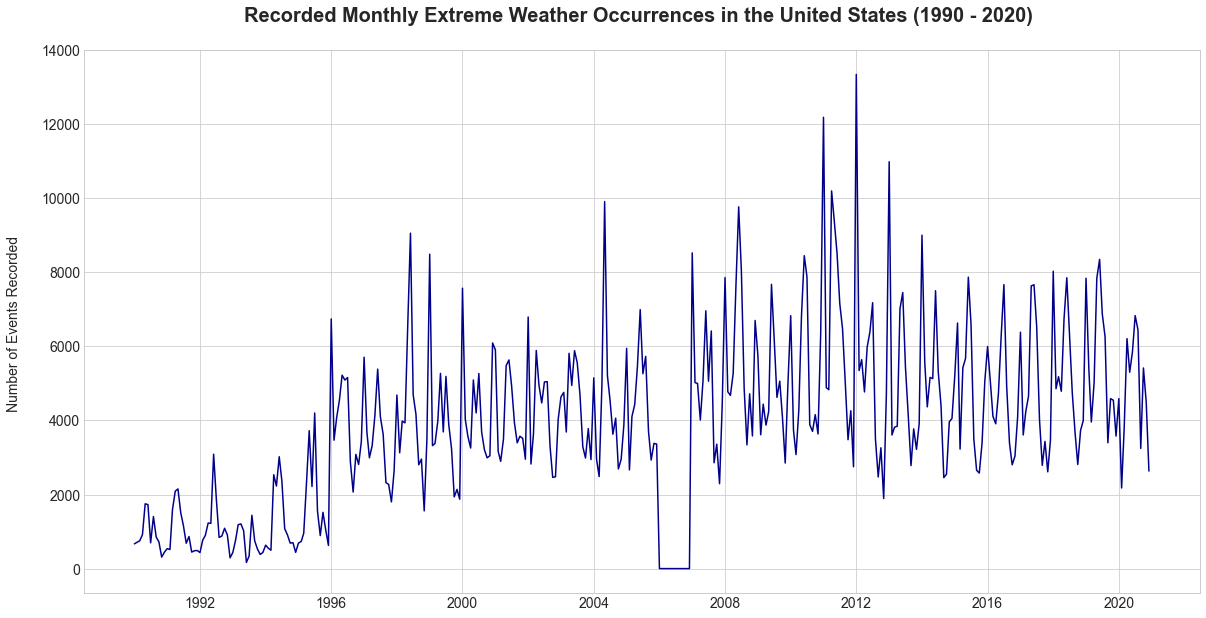

In [72]:
#Plot the monthly frequency of storms
plt.figure(figsize =(20, 10))
plt.plot(freqstorm.STORM_COUNT, color = "darkblue")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Number of Events Recorded \n", fontsize = 14)
plt.title("Recorded Monthly Extreme Weather Occurrences in the United States (1990 - 2020) \n", 
         fontsize = 20, fontweight = "bold")
plt.show();

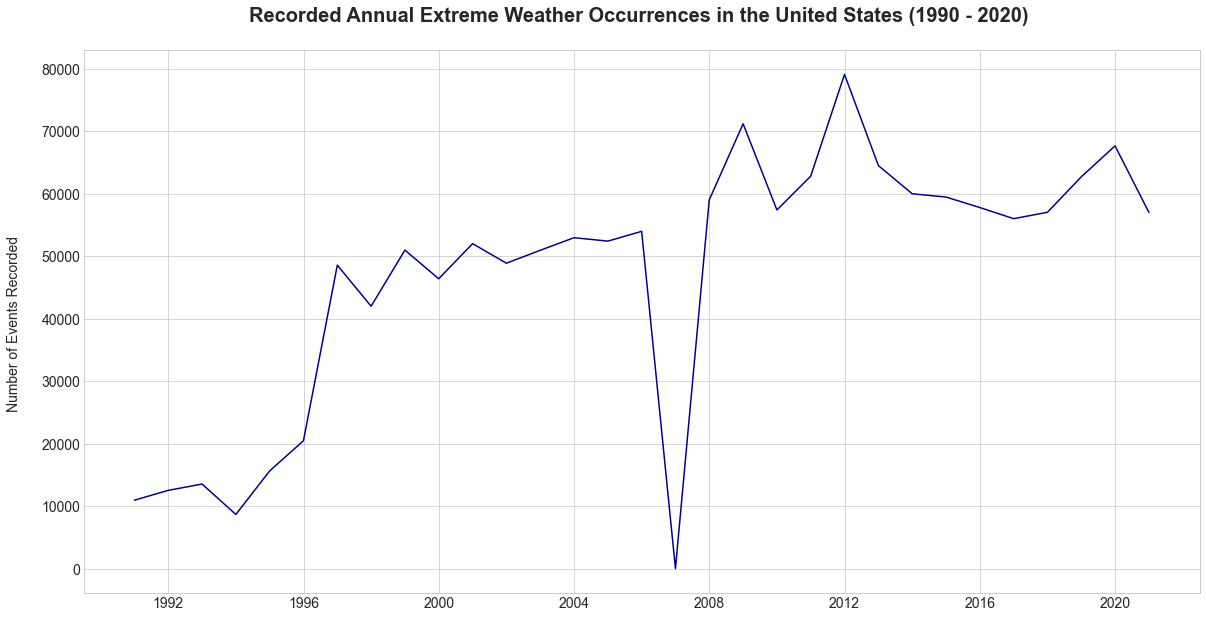

In [73]:
#Zoom in on annual storm occurrences in the United States
annualstorms = freqstorm.resample('Y').sum()

#Plot
plt.figure(figsize =(20, 10))
plt.plot(annualstorms.STORM_COUNT, color = "darkblue");
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Number of Events Recorded \n", fontsize = 14)
plt.title("Recorded Annual Extreme Weather Occurrences in the United States (1990 - 2020) \n", 
         fontsize = 20, fontweight = "bold")
plt.show();

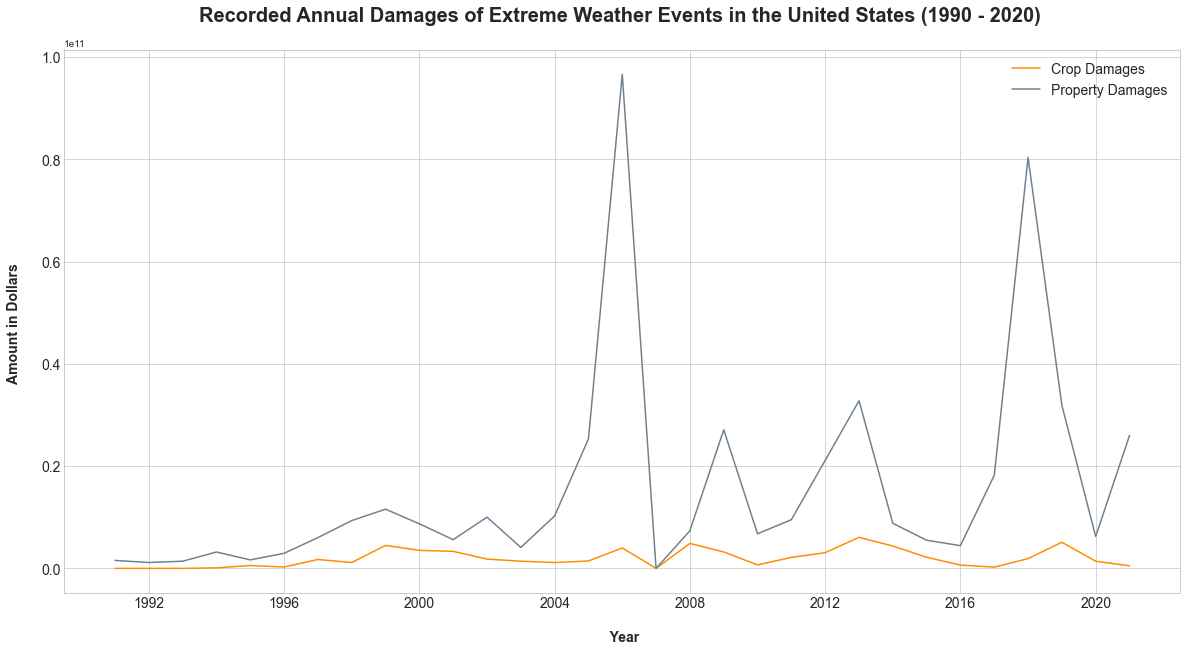

In [74]:
#Explore Damages of extreme weather events
fig = plt.figure(figsize =(20, 10))
crops = plt.plot(annualstorms.DAMAGE_CROPS, color = "darkorange", label = "Crop Damages")
prop = plt.plot(annualstorms.DAMAGE_PROPERTY, color = "slategrey", label = "Property Damages")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\n Year", fontsize = 14, fontweight = "bold")
plt.ylabel("Amount in Dollars \n", fontsize = 14, fontweight = "bold")
plt.legend(fontsize = 14)
plt.title("Recorded Annual Damages of Extreme Weather Events in the United States (1990 - 2020) \n", 
         fontsize = 20, fontweight = "bold")
plt.show();

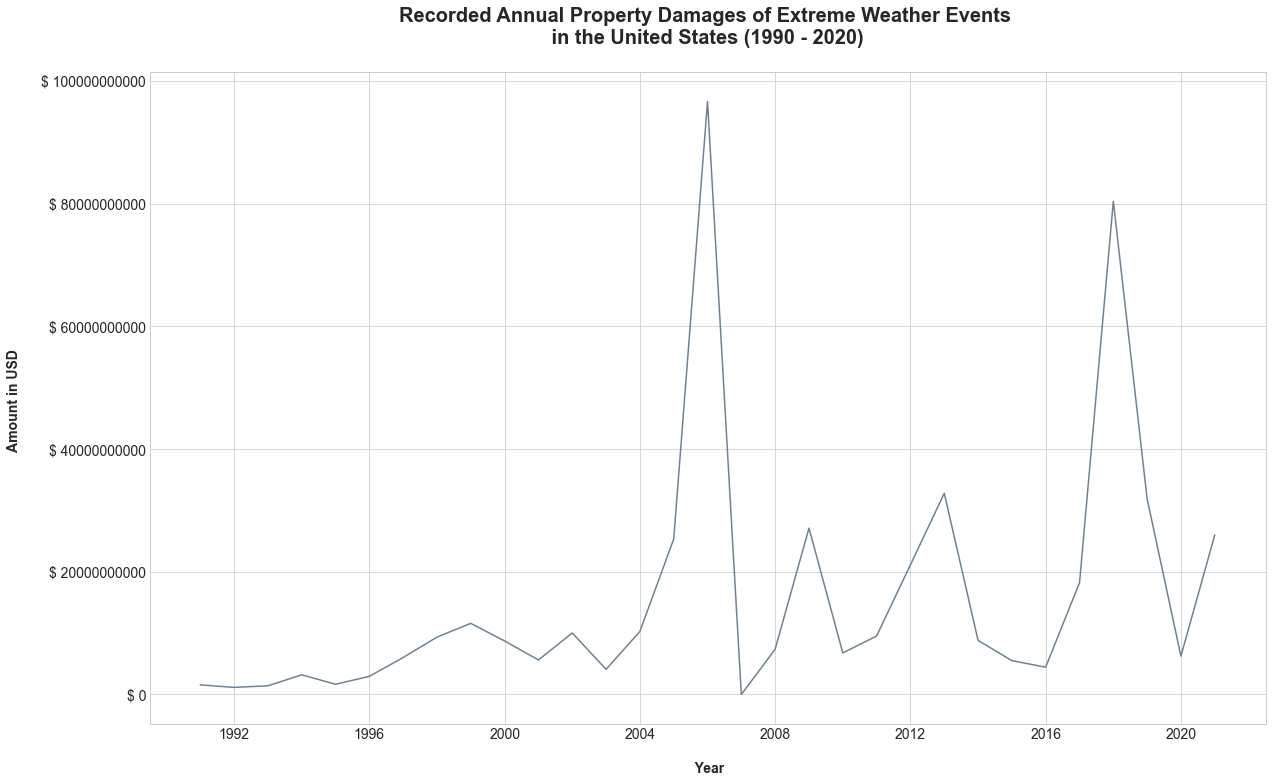

In [75]:
#Property Damage
fig = plt.figure(figsize =(20, 12))
ax = plt.subplot()
ax.plot(annualstorms.DAMAGE_PROPERTY, color = "slategrey")
ax.yaxis.set_major_formatter('$ {x:1.00f}')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\n Year", fontsize = 14, fontweight = "bold")
plt.ylabel("Amount in USD \n", fontsize = 14, fontweight = "bold")
plt.title("Recorded Annual Property Damages of Extreme Weather Events \n in the United States (1990 - 2020) \n", 
         fontsize = 20, fontweight = "bold")
plt.show();

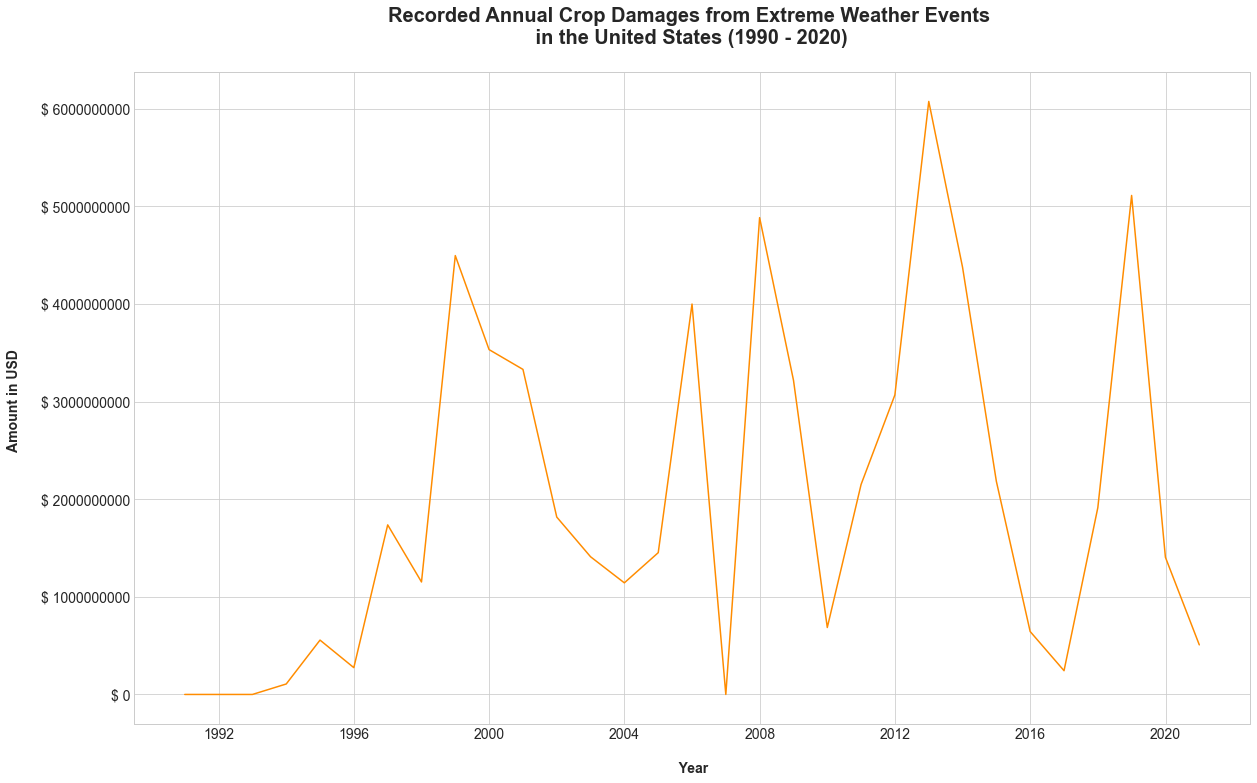

In [76]:
fig = plt.figure(figsize =(20, 12))
ax = fig.add_subplot()
ax.plot(annualstorms.DAMAGE_CROPS, color = "darkorange")
ax.yaxis.set_major_formatter('$ {x:1.00f}')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("\n Year", fontsize = 14, fontweight = "bold")
plt.ylabel("Amount in USD \n", fontsize = 14, fontweight = "bold")
plt.title("Recorded Annual Crop Damages from Extreme Weather Events \n in the United States (1990 - 2020) \n", 
         fontsize = 20, fontweight = "bold")
plt.show();

In [77]:
#Looking at specific weather events
thunderstorm = genstorm.loc[genstorm.EVENT_TYPE == 'Thunderstorm Wind']
hail = genstorm.loc[genstorm.EVENT_TYPE == 'Hail']
flashflood = genstorm.loc[genstorm.EVENT_TYPE == 'Flash Flood']
winterstorm = genstorm.loc[(genstorm.EVENT_TYPE == 'Winter Storm') | (genstorm.EVENT_TYPE == 'Winter Weather')]
heat = genstorm.loc[(genstorm.EVENT_TYPE == 'Heat') | (genstorm.EVENT_TYPE == 'Excessive Heat')]
highwind = genstorm.loc[genstorm.EVENT_TYPE == 'High Wind']
drought = genstorm.loc[genstorm.EVENT_TYPE == 'Drought']
tornado = genstorm.loc[genstorm.EVENT_TYPE == 'Tornado']
heavyrain = genstorm.loc[genstorm.EVENT_TYPE == 'Heavy Rain']
wildfire = genstorm.loc[genstorm.EVENT_TYPE == 'Wildfire']

### 3.4 Transforming and Testing for Stationarity

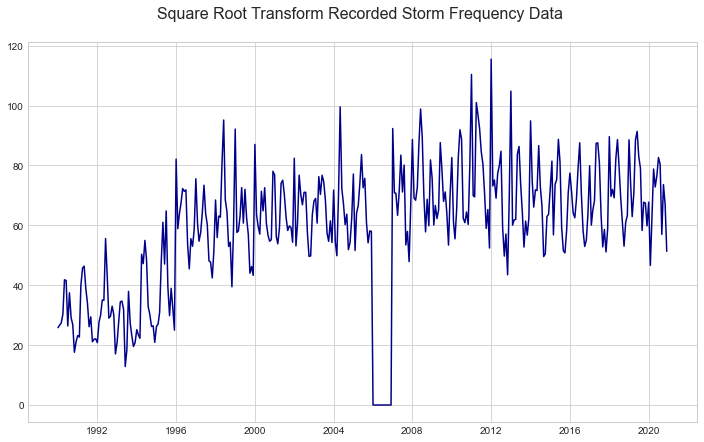

In [79]:
#Removing Trends 2: log transform
stormdata = np.sqrt(freqstorm.STORM_COUNT)

#Plot
plt.figure(figsize = (12, 7))
plt.plot(stormdata, color = "darkblue")
plt.title("Square Root Transform Recorded Storm Frequency Data \n", fontsize = 16)
plt.show();

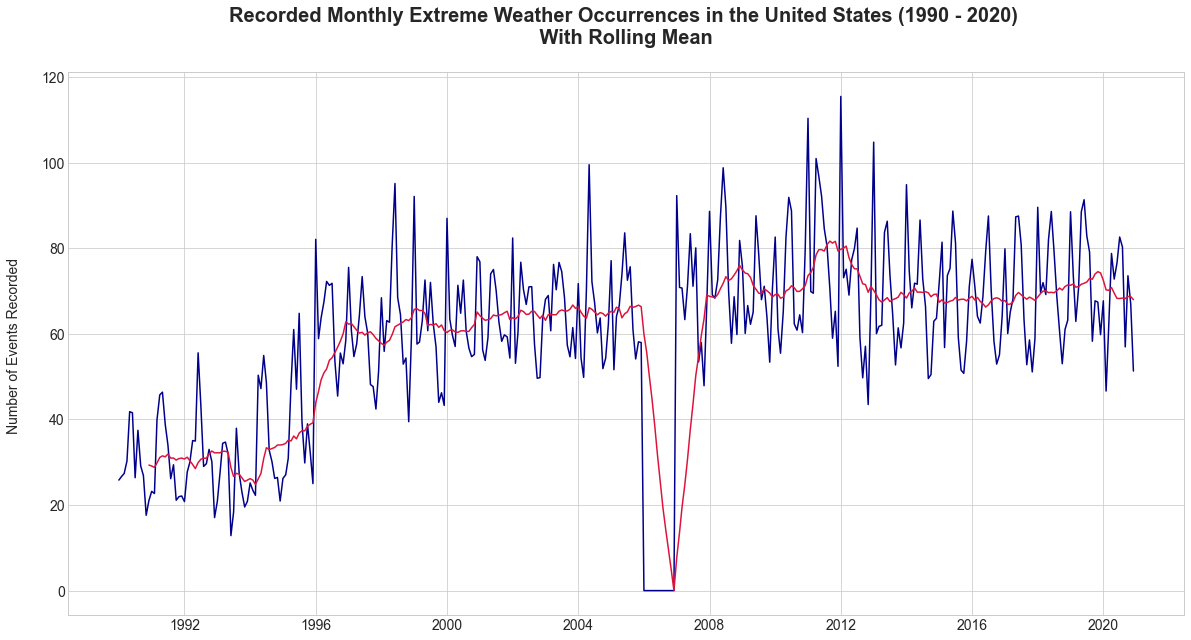

In [80]:
#Looking at Rolling Mean
rolmean_all = stormdata.rolling(window = 12).mean()

#plot
fig = plt.figure(figsize =(20, 10))
orig = plt.plot(stormdata, color = "darkblue")
mean = plt.plot(rolmean_all, color = "crimson")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Number of Events Recorded \n", fontsize = 14)
plt.title("Recorded Monthly Extreme Weather Occurrences in the United States (1990 - 2020) \n With Rolling Mean \n", 
         fontsize = 20, fontweight = "bold")
plt.show();

In [81]:
#Removing Trend: Subtracting rolling mean
stormtrend = stormdata - rolmean_all

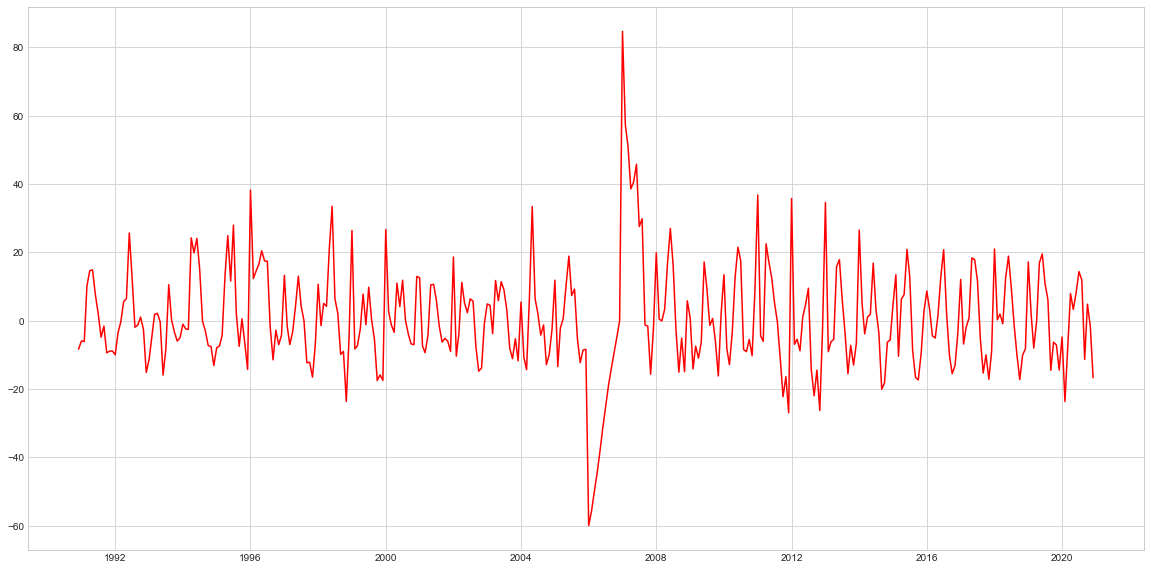

In [82]:
plt.figure(figsize = (20, 10))
plt.plot(stormtrend, color = "red")
plt.show();

In [83]:
#Check storm_trend1 for null values and subtract them
stormtrend.dropna(inplace = True)

In [84]:
#Dickey-Fuller Test 
stormtest = adfuller(stormtrend)

In [85]:
#Display test results
dfoutput = pd.Series(stormtest[0:4], index = ['Test-Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in stormtest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Test-Statistic                -6.608232e+00
p-value                        6.474914e-09
#Lags Used                     1.500000e+01
Number of Observations Used    3.450000e+02
Critical Value (1%)           -3.449447e+00
Critical Value (5%)           -2.869954e+00
Critical Value (10%)          -2.571253e+00
dtype: float64


**With a p-value of 3.726577e-08, the Dickey-Fuller test seems to indicate the data is Stationary.**

### 3.5 Autocorrelation and Partial Autocorrelation Functions

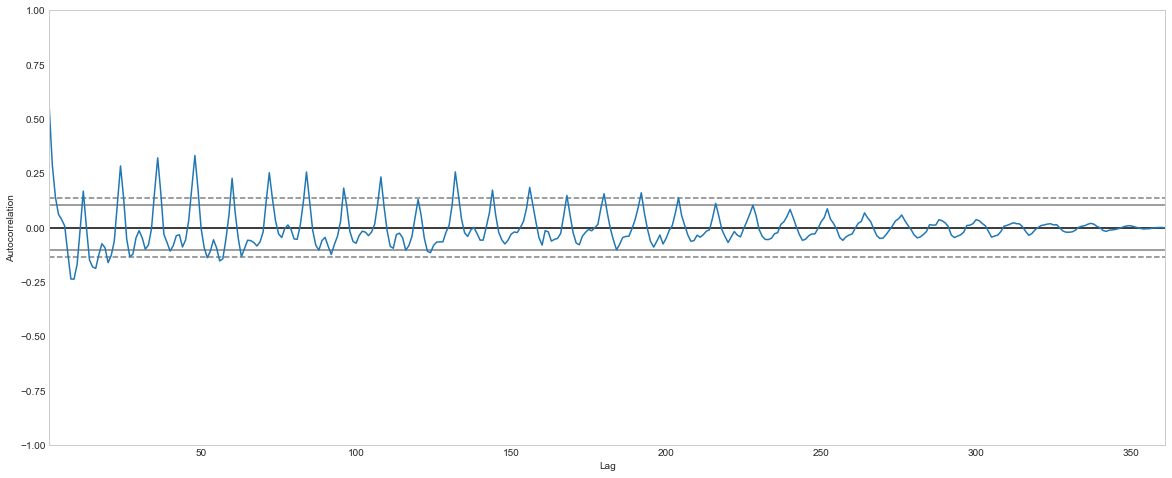

In [86]:
plt.figure(figsize = (20, 8))
pd.plotting.autocorrelation_plot(stormtrend);

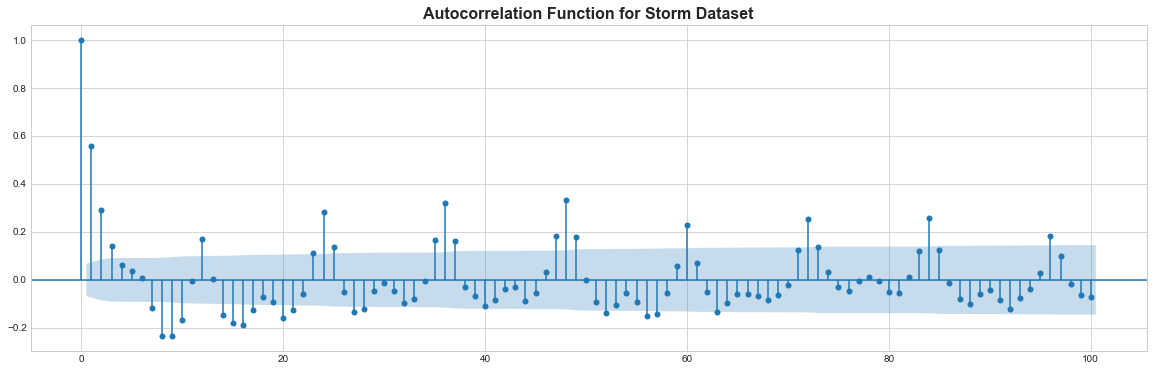

In [87]:
rcParams['figure.figsize'] = 20, 6
plot_acf(stormtrend, lags = 100, alpha = .2)
plt.title("Autocorrelation Function for Storm Dataset", fontsize = 16, fontweight = "bold");

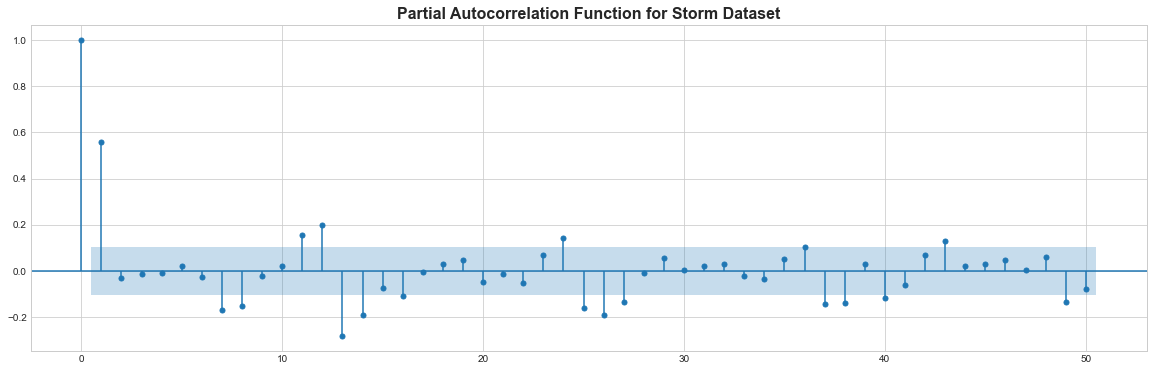

In [88]:
plot_pacf(stormtrend, lags = 50)
plt.title("Partial Autocorrelation Function for Storm Dataset", fontsize = 16, fontweight = "bold");

### 3.6 ARIMA Modeling for Extreme Weather Frequency

In [117]:
#Generate different combinations for p, d and q parameters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [118]:
#Run a grid with the different parameters to calculate best AIC
res = []
for param in pdq:
    for params in pdqs:
        try:
            model = ARIMA(stormtrend, order = param, seasonal_order = params)
            output = model.fit()
            res.append([param, params, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(param, params, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =2278.0472906846617
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =2279.4528361097036
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =2342.709552752234
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =2148.6793323371458
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =2279.221990191493
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =2237.6280524735994
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =2238.3024340690636
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =2137.2378977236904
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =2199.176392747814
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =2198.0916655413366
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =2245.091300656503
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =2067.391836727213
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =2196.8529557878473
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =2153.330421072834
ARIMA (0, 0,

In [91]:
# Find the parameters with minimal AIC value
resdf = pd.DataFrame(res, columns=['pdq', 'pdqs', 'aic'])
resdf.loc[resdf['aic'].idxmin()]

pdq         (1, 0, 1)
pdqs    (0, 1, 1, 12)
aic           2662.29
Name: 43, dtype: object

In [92]:
storm_model = ARIMA(stormtrend, order = (1, 0, 1), seasonal_order = (0, 1, 1, 12)).fit()
storm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                      STORM_COUNT   No. Observations:                  361
Model:             ARIMA(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1327.144
Date:                          Thu, 29 Apr 2021   AIC                           2662.288
Time:                                  15:55:20   BIC                           2677.709
Sample:                              12-01-1990   HQIC                          2668.427
                                   - 12-01-2020                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7452      0.059     12.559      0.000       0.629       0.861
ma.L1         -0.2356      0.080     -2.947      0.003      -0.392      -0.079
ma.S.L12      -0.9266      0.034    -27.389      0.000      -0.993      -0.860
sigma2       109.8831      4.570     24.044      0.000     100.926     118.840
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2510.42
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.84
Prob(H) (two-sided):                  0.40   Kurtosis:                        16.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 3.7 Evaluate Model

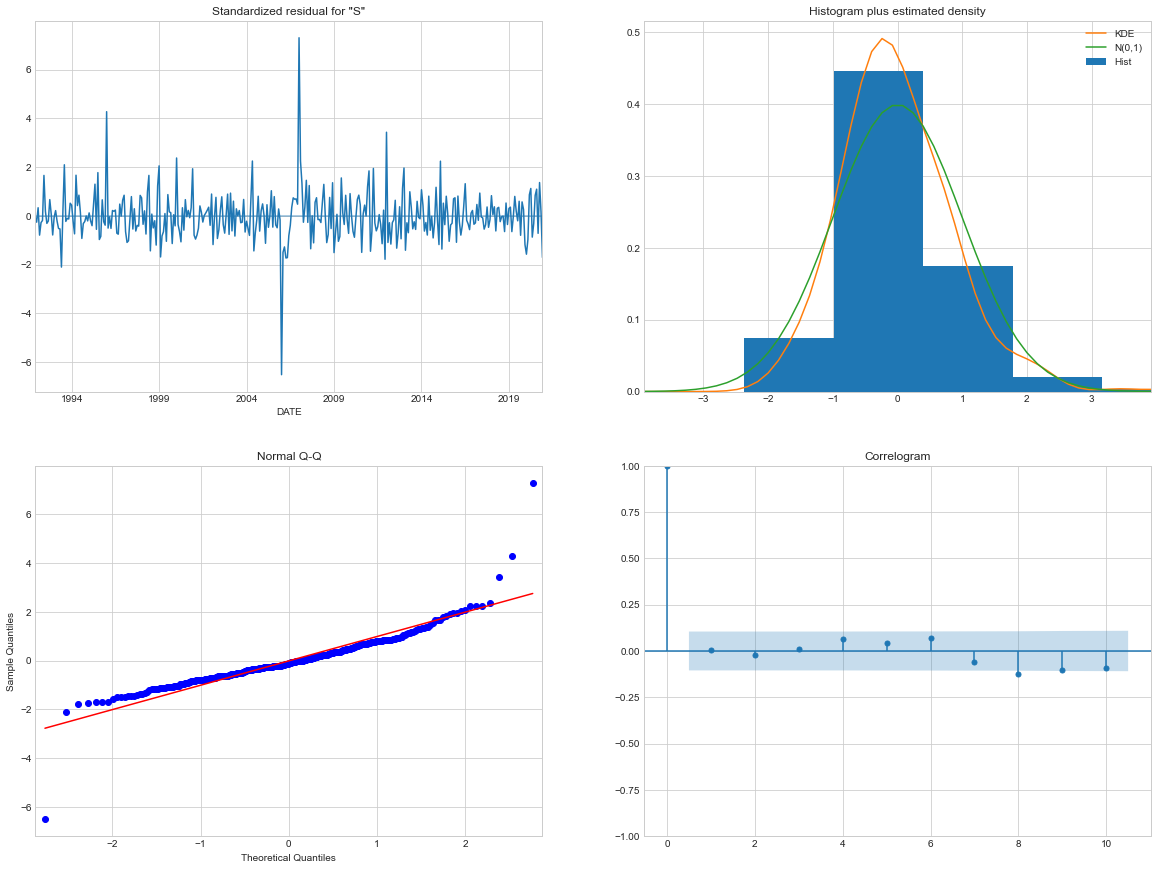

In [93]:
#Check diagnostics
storm_model.plot_diagnostics(figsize = (20, 15));

In [94]:
#Generate Predictions for number of extreme weather events 
pred_values = storm_model.predict()

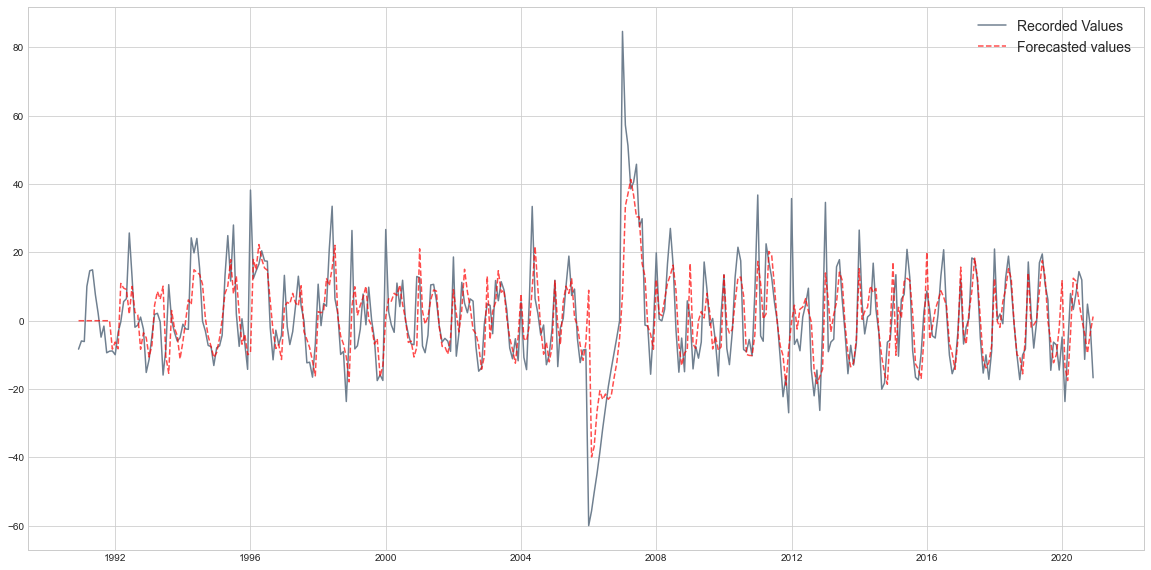

In [95]:
#Plot real v. predicted values for model evaluation
fig = plt.figure(figsize = (20, 10))
real = plt.plot(stormtrend, color = "slategrey", label = "Recorded Values")
predicted = plt.plot(pred_values, label = "Forecasted values", color = "red", linestyle = 'dashed', alpha = .7)
plt.legend(fontsize = 14)

plt.show()